# **Molecular Phylogenetics**
## **Rooting and comparing trees; Dating**

### **0) Programmes used**

|Program|
|-------|
|ete3|
|entrez-direct|
|mafft|
|iqtree|
|biopython|
|beast2|
|tracer|

- OS: macOS Ventura 13.6.4
- CPU: Apple M1
- RAM: 8GB

## **Part 1 - Rooting trees**

### **1) Rooting a tree by a known external clade in `IQ-TREE`**

In [ ]:
! iqtree2 -s data/SUP35_aln_prank.trim.fas -m TIM3+F+G4 -pre data/iqtree_ufb/SUP35_TIM3_ufb -bb 1000

In [ ]:
! iqtree2 -s data/SUP35_aln_prank.trim.fas -m TIM3+F+G4 -pre data/iqtree_ufb_alrt_abayes/SUP35_TIM3_ufb_alrt_abayes -bb 1000 -alrt 1000 -abayes

In [ ]:
! iqtree2 -s data/SUP35_aln_prank.trim.fas -m TIM3+F+G4 -pre data/iqtree_root_outgroup/SUP35_TIM3_root_outgroup -bb 1000 -alrt 1000 -abayes  -o SUP35_Kla_AB039749,SUP35_Agos_ATCC_10895_NM_211584

### **2) Rooting a tree using `midpoint rooting`**

Using `python`

In [5]:
! python3 scripts/midpoint_root.py data/iqtree_ufb/SUP35_TIM3_ufb.treefile >data/iqtree_ufb/SUP35_TIM3_ufb_midpoint.treefile

Using `R`

In [ ]:
! Rscript scripts/midpoint_root.R

#### **2.1) Visualisation of the rooted trees from the previous paragraphs**

In [ ]:
! Rscript scripts/draw_tree.R data/iqtree_ufb/SUP35_TIM3_ufb.treefile imgs/SUP35_TIM3_ufb.png
! Rscript scripts/draw_tree.R data/iqtree_ufb/SUP35_TIM3_ufb_midpoint.treefile imgs/SUP35_TIM3_ufb_midpoint.png
! Rscript scripts/draw_tree.R data/iqtree_root_outgroup/SUP35_TIM3_root_outgroup.treefile imgs/SUP35_TIM3_root_outgroup.png
! Rscript scripts/draw_tree.R data/iqtree_ufb_alrt_abayes/SUP35_TIM3_ufb_alrt_abayes_rooted.treefile imgs/SUP35_TIM3_ufb_alrt_abayes_rooted.png

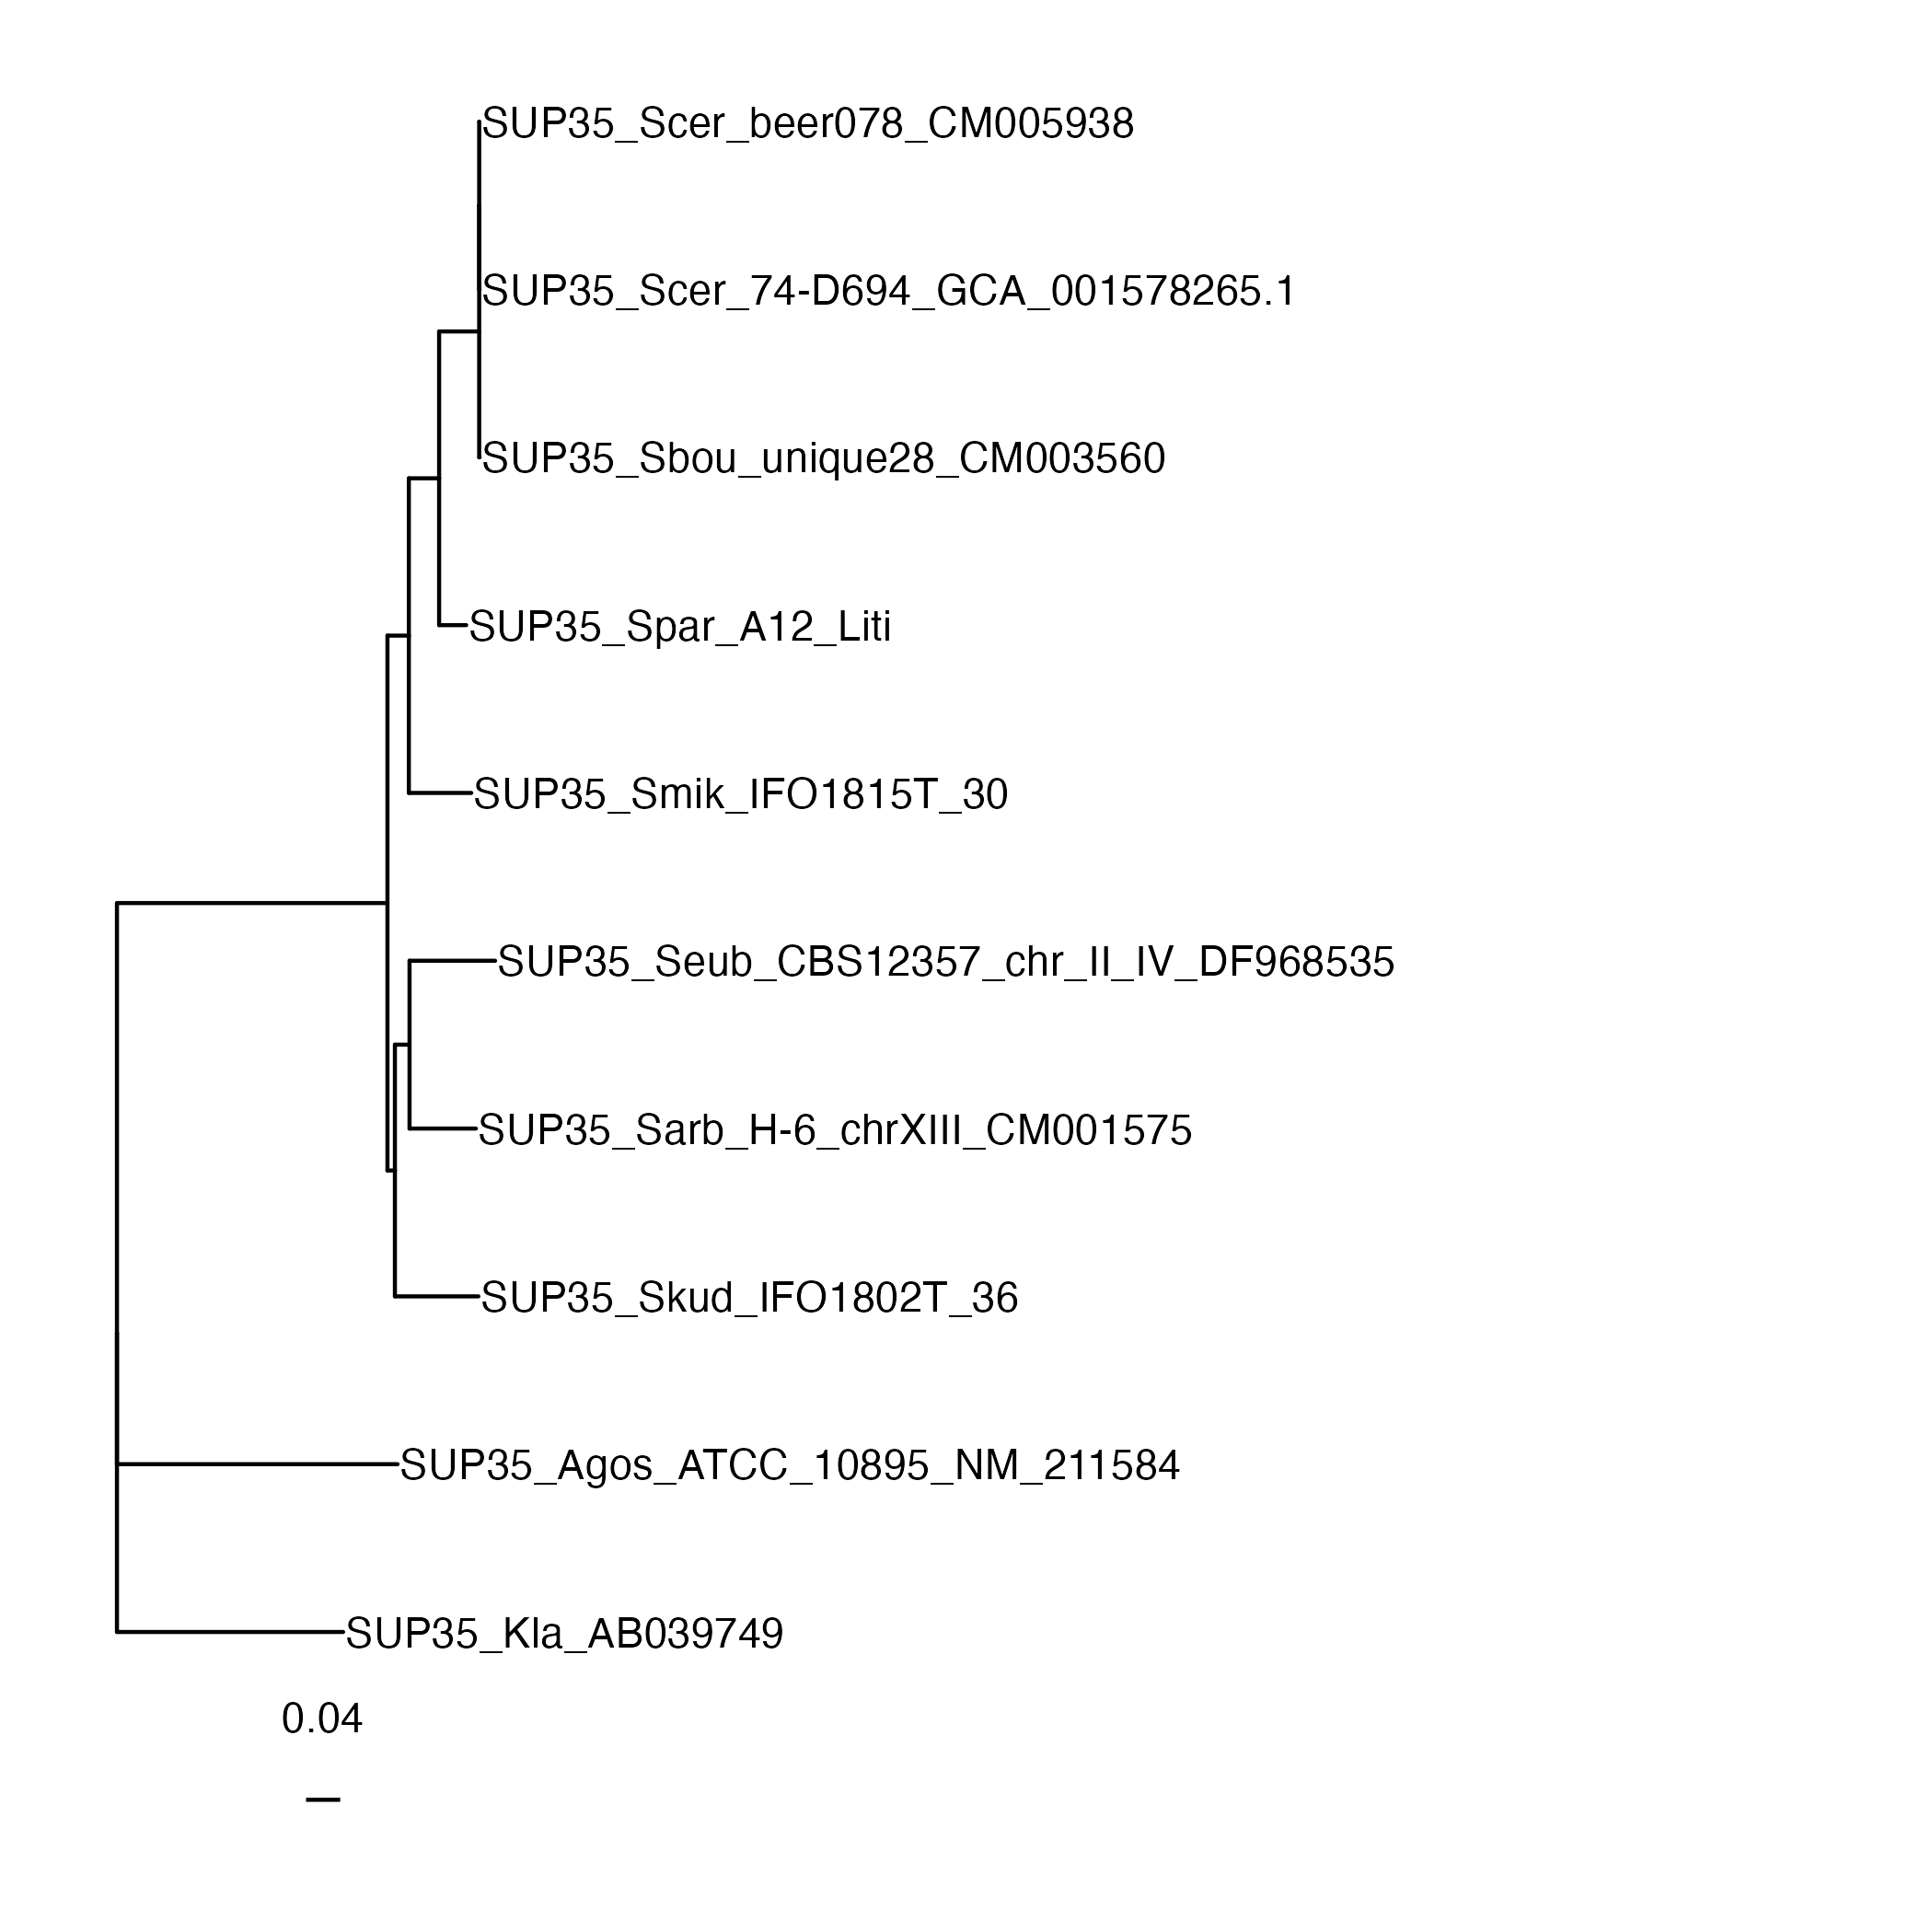
SUP35_TIM3_ufb.png

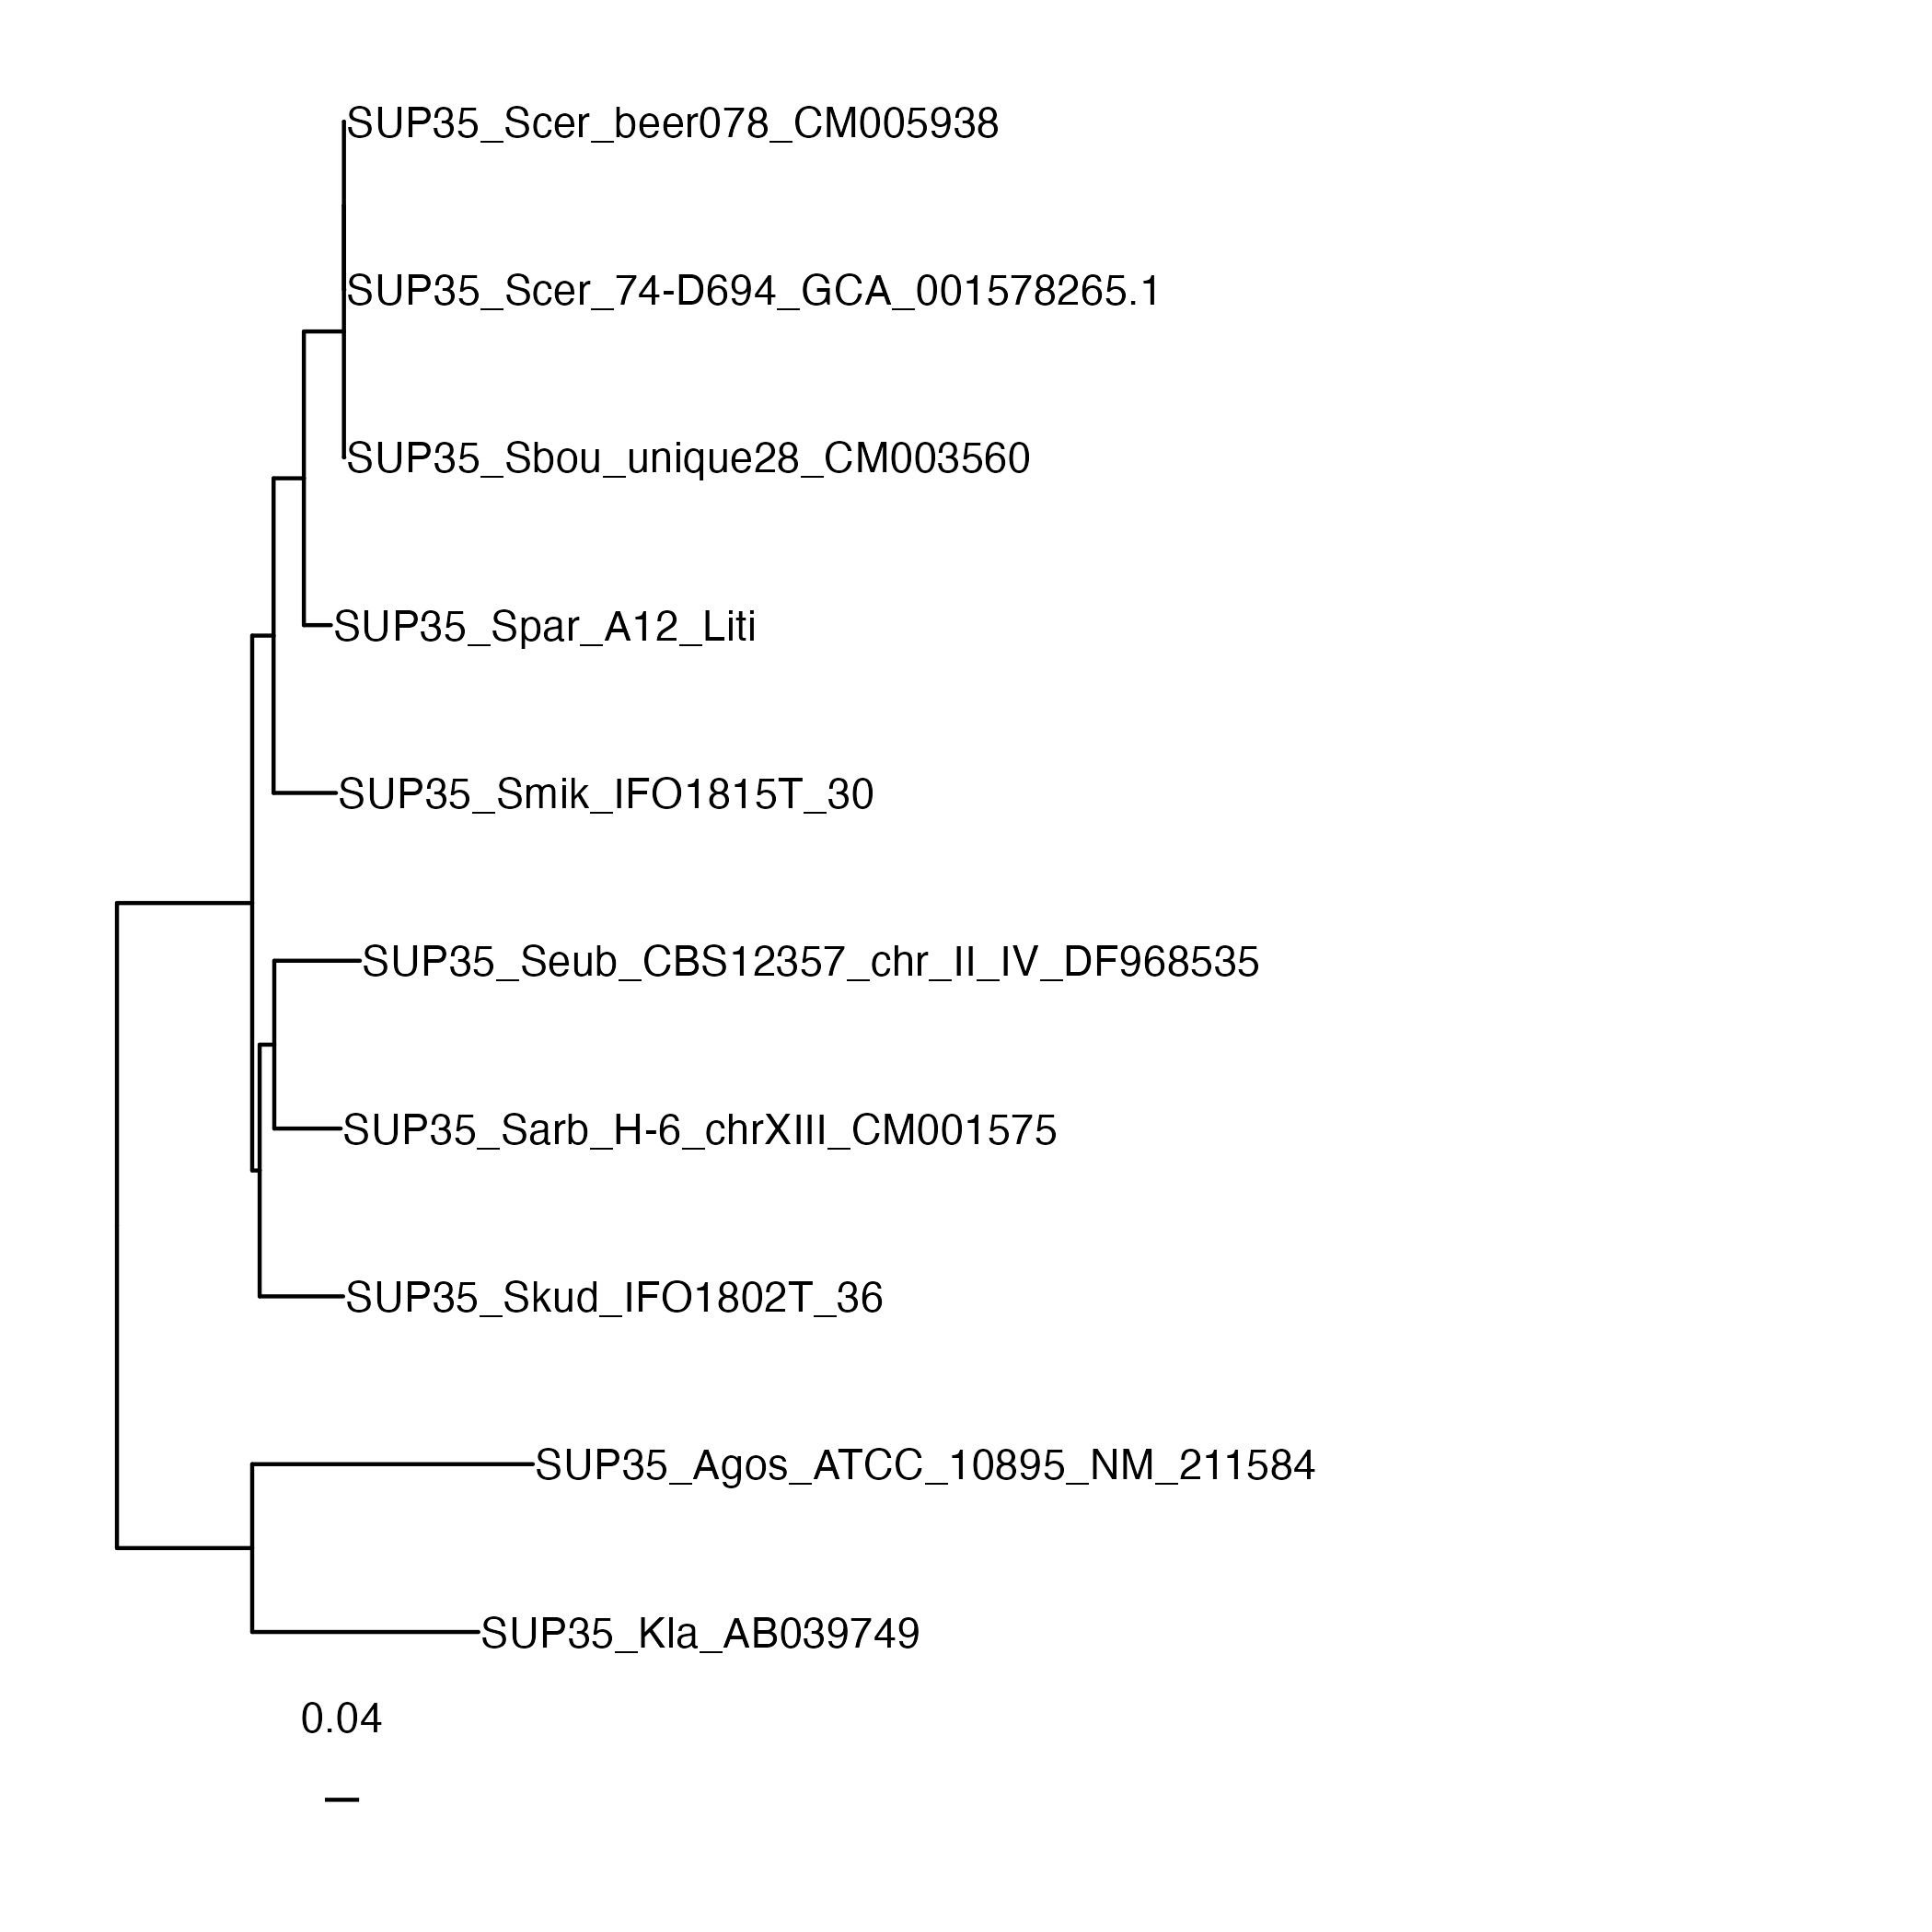
SUP35_TIM3_ufb_midpoint.png

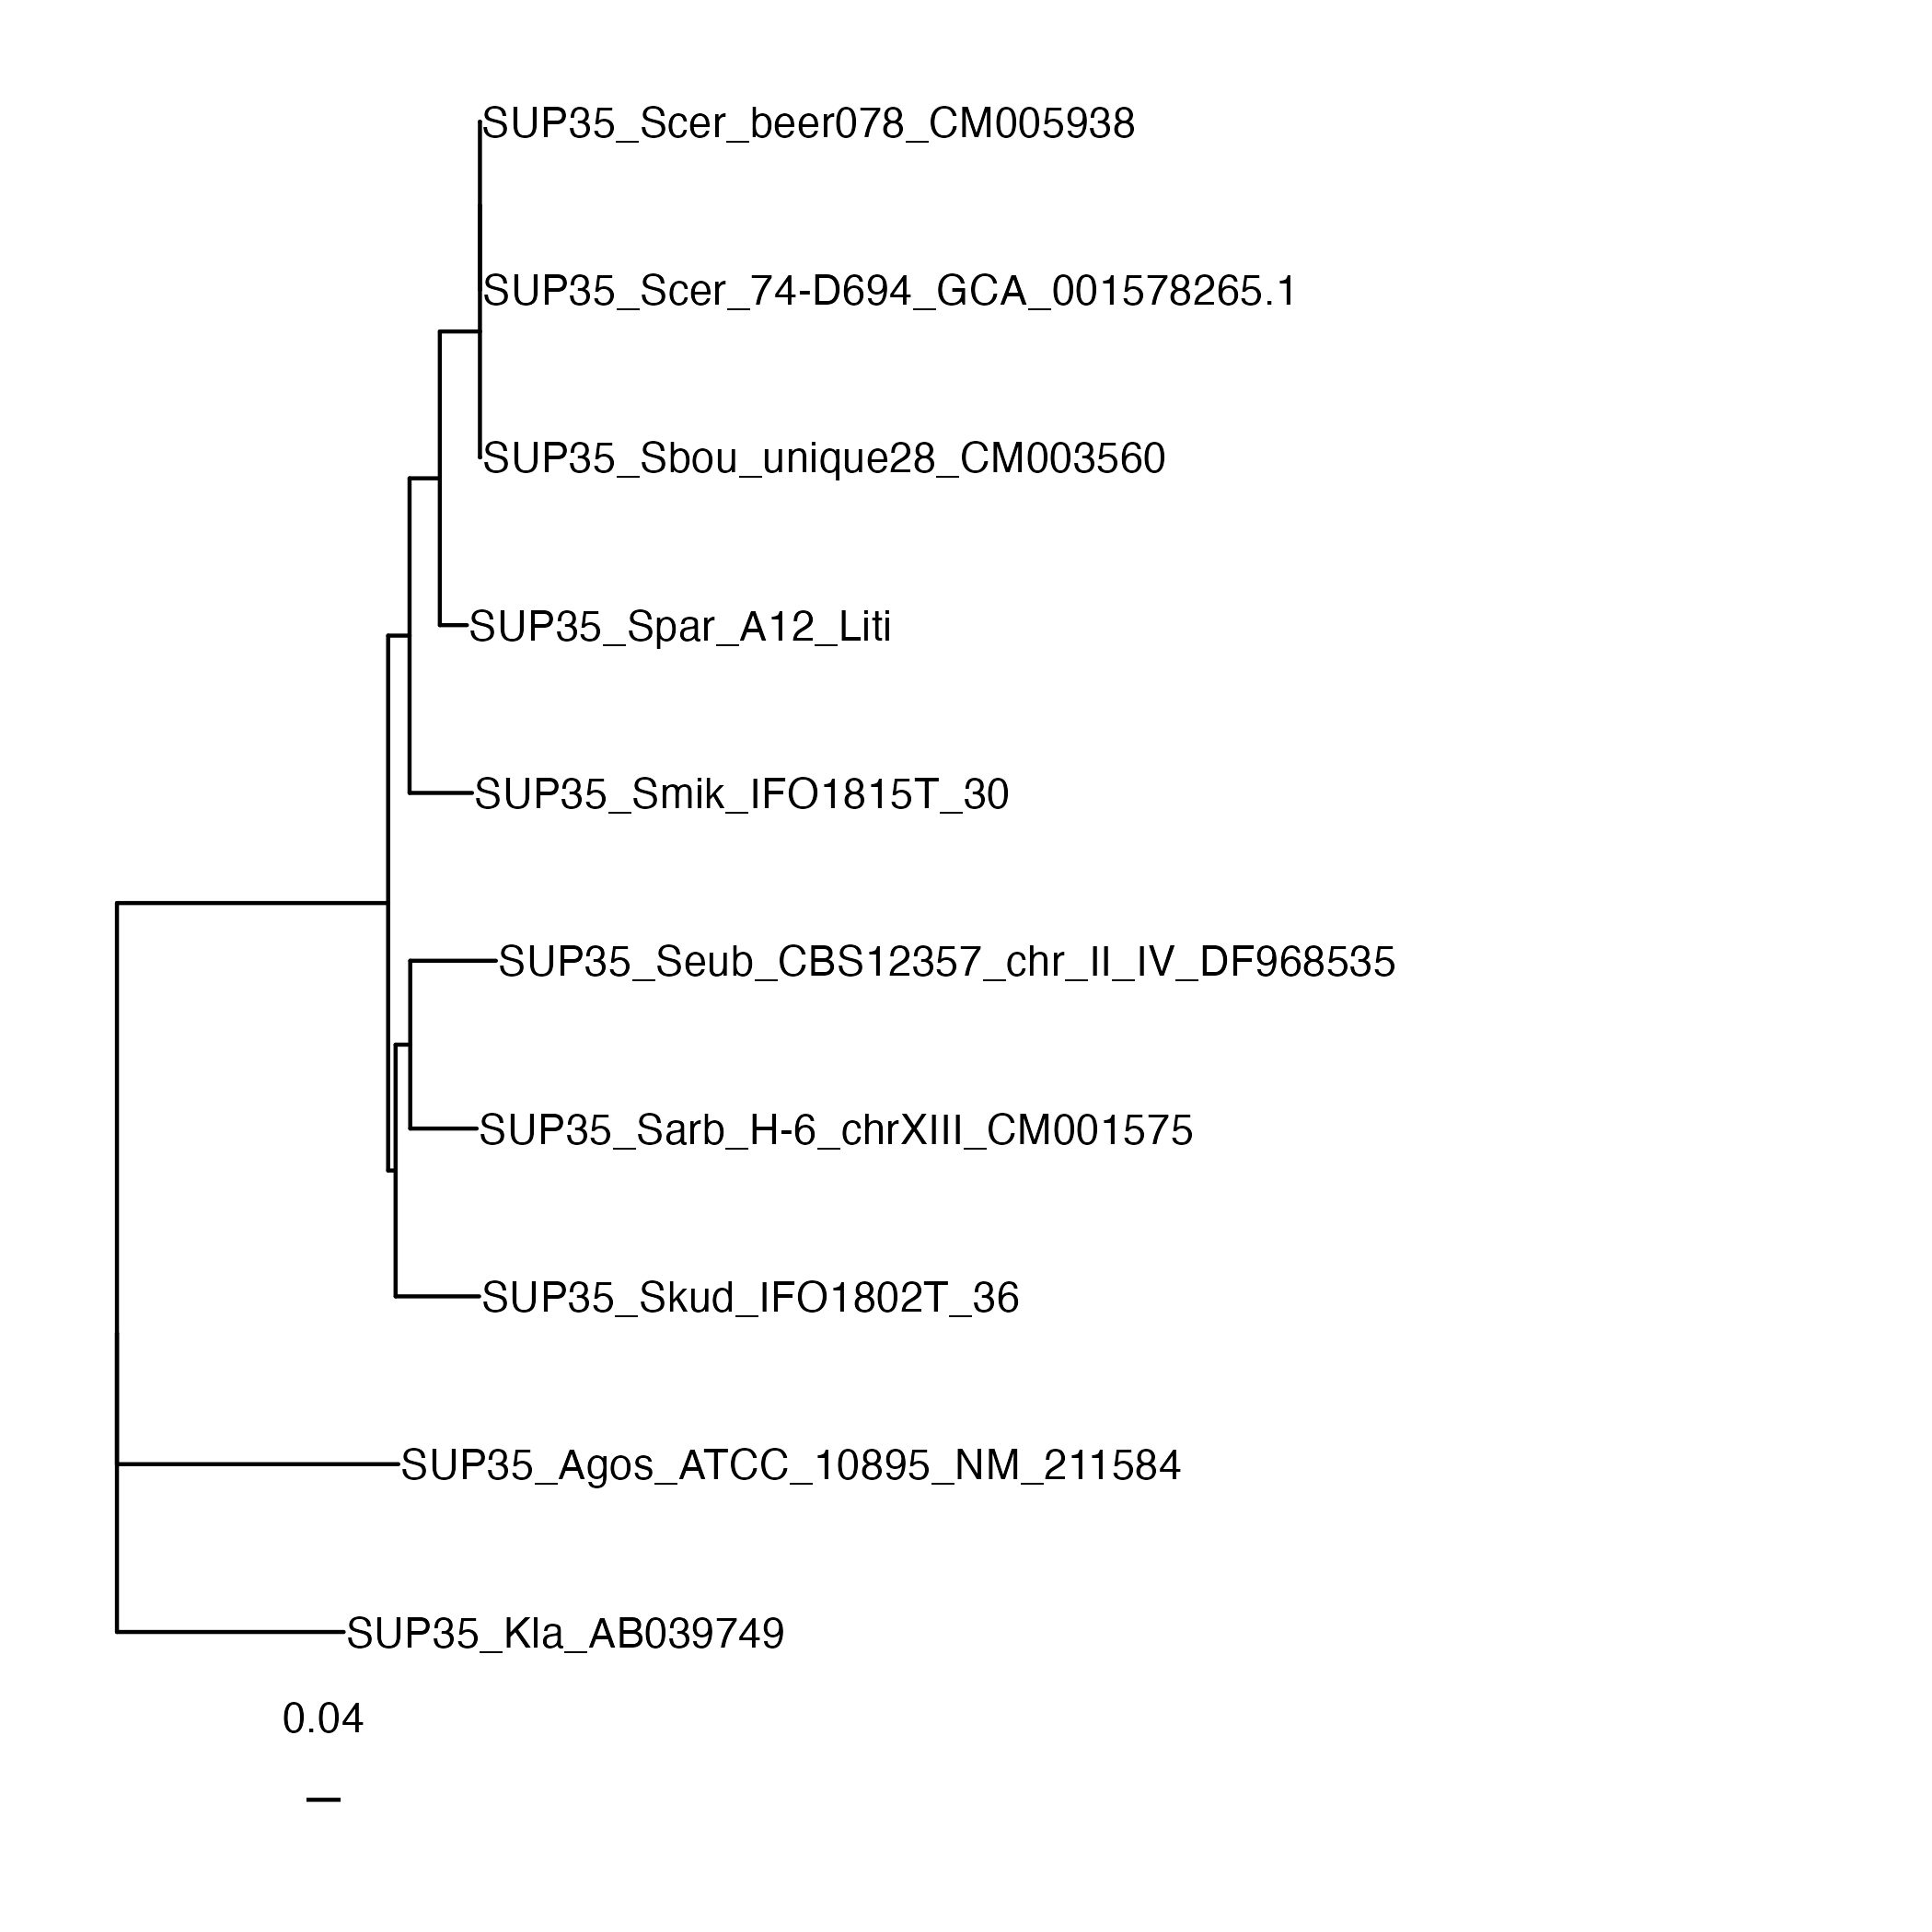
SUP35_TIM3_root_outgroup.png

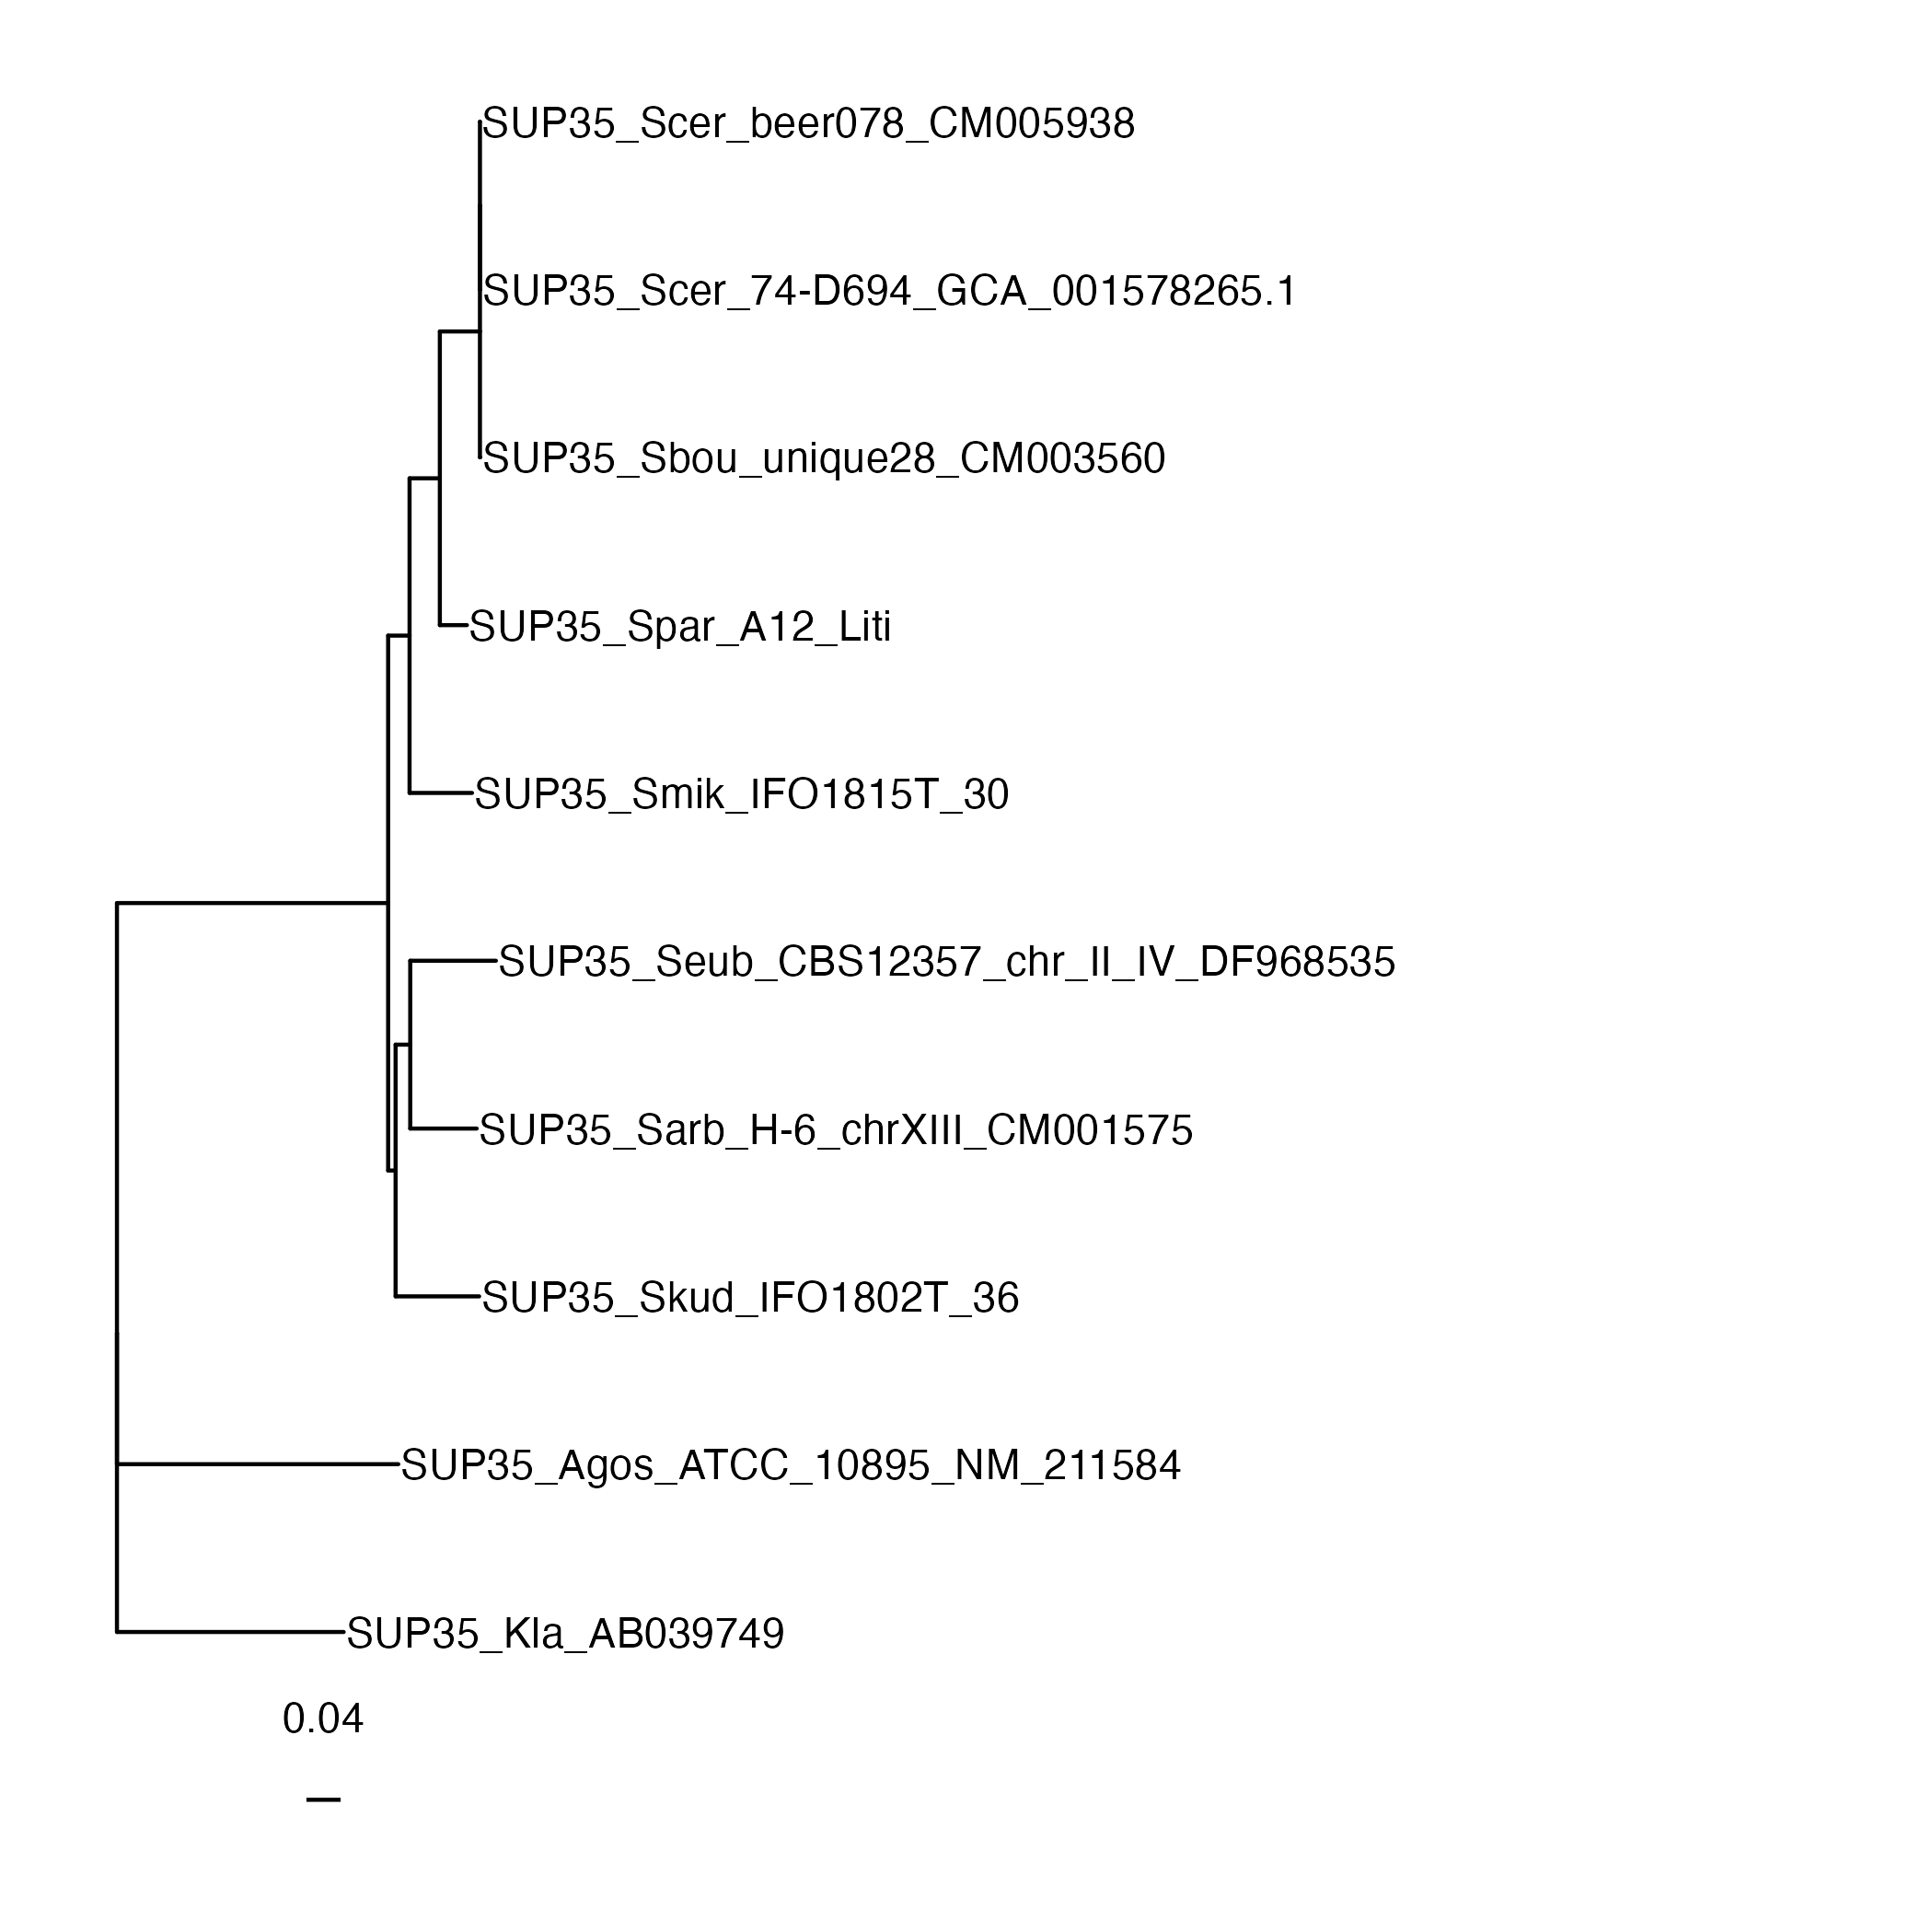
SUP35_TIM3_ufb_alrt_abayes_rooted.png

##### **2.1.1) Comparison of trees**

- Unrooted and rooted by external group are completely identical. 0 differences.
- Rooted by `midpoint` looks neater. Topology looks better.

### **3) Rooting a tree using an irreversible (`non-reversible`) model (`iq-tree2`)**

If we have a rather complex tree structure (it is huge, there are long branches, imbalance in sampling by different taxa), rooting the tree by external group will not give us the result we expect.<br>
There are more intelligent models for this.<br>
One of them is the easy-to-apply `non-reversible` model `iq-tree2`.<br>
The idea is that they allow you to predict where the root was! This, by analogy with `bootstrap` is called `rootstrap`.

In [ ]:
! iqtree2 -s data/SUP35_aln_prank.trim.fas -m TIM3+F+G4 -pre data/iqtree_root_auto/SUP35_TIM3_root_auto --model-joint 12.12 -B 1000
# -B 1000 -  it's not `bootstrap`, it's how many times to run `rootstrap`

In [ ]:
! cat data/iqtree_root_auto/SUP35_TIM3_root_auto.rootstrap.nex
# - contains information about the algorithm's confidence in where the root is located

This is basically a `Newick` file, but strange `Newick`  because it has square brackets in it.
Programs that read `Newick` format will not be able to read this tree. According to the developers of `iqtree` it is better to read this tree in `FigTree`.

### **4) Root-supported tree visualisation (`rootstrap`)**
> What can we say about the algorithm's confidence in root selection?

In [ ]:
! figtree data/iqtree_root_auto/SUP35_TIM3_root_auto.rootstrap.nex

`FigTree` is the GUI application. So I will just provide as many screenshots as possible.

![Screenshot 2024-03-16 at 00.24.10.png](<attachment:Screenshot 2024-03-16 at 00.24.10.png>)
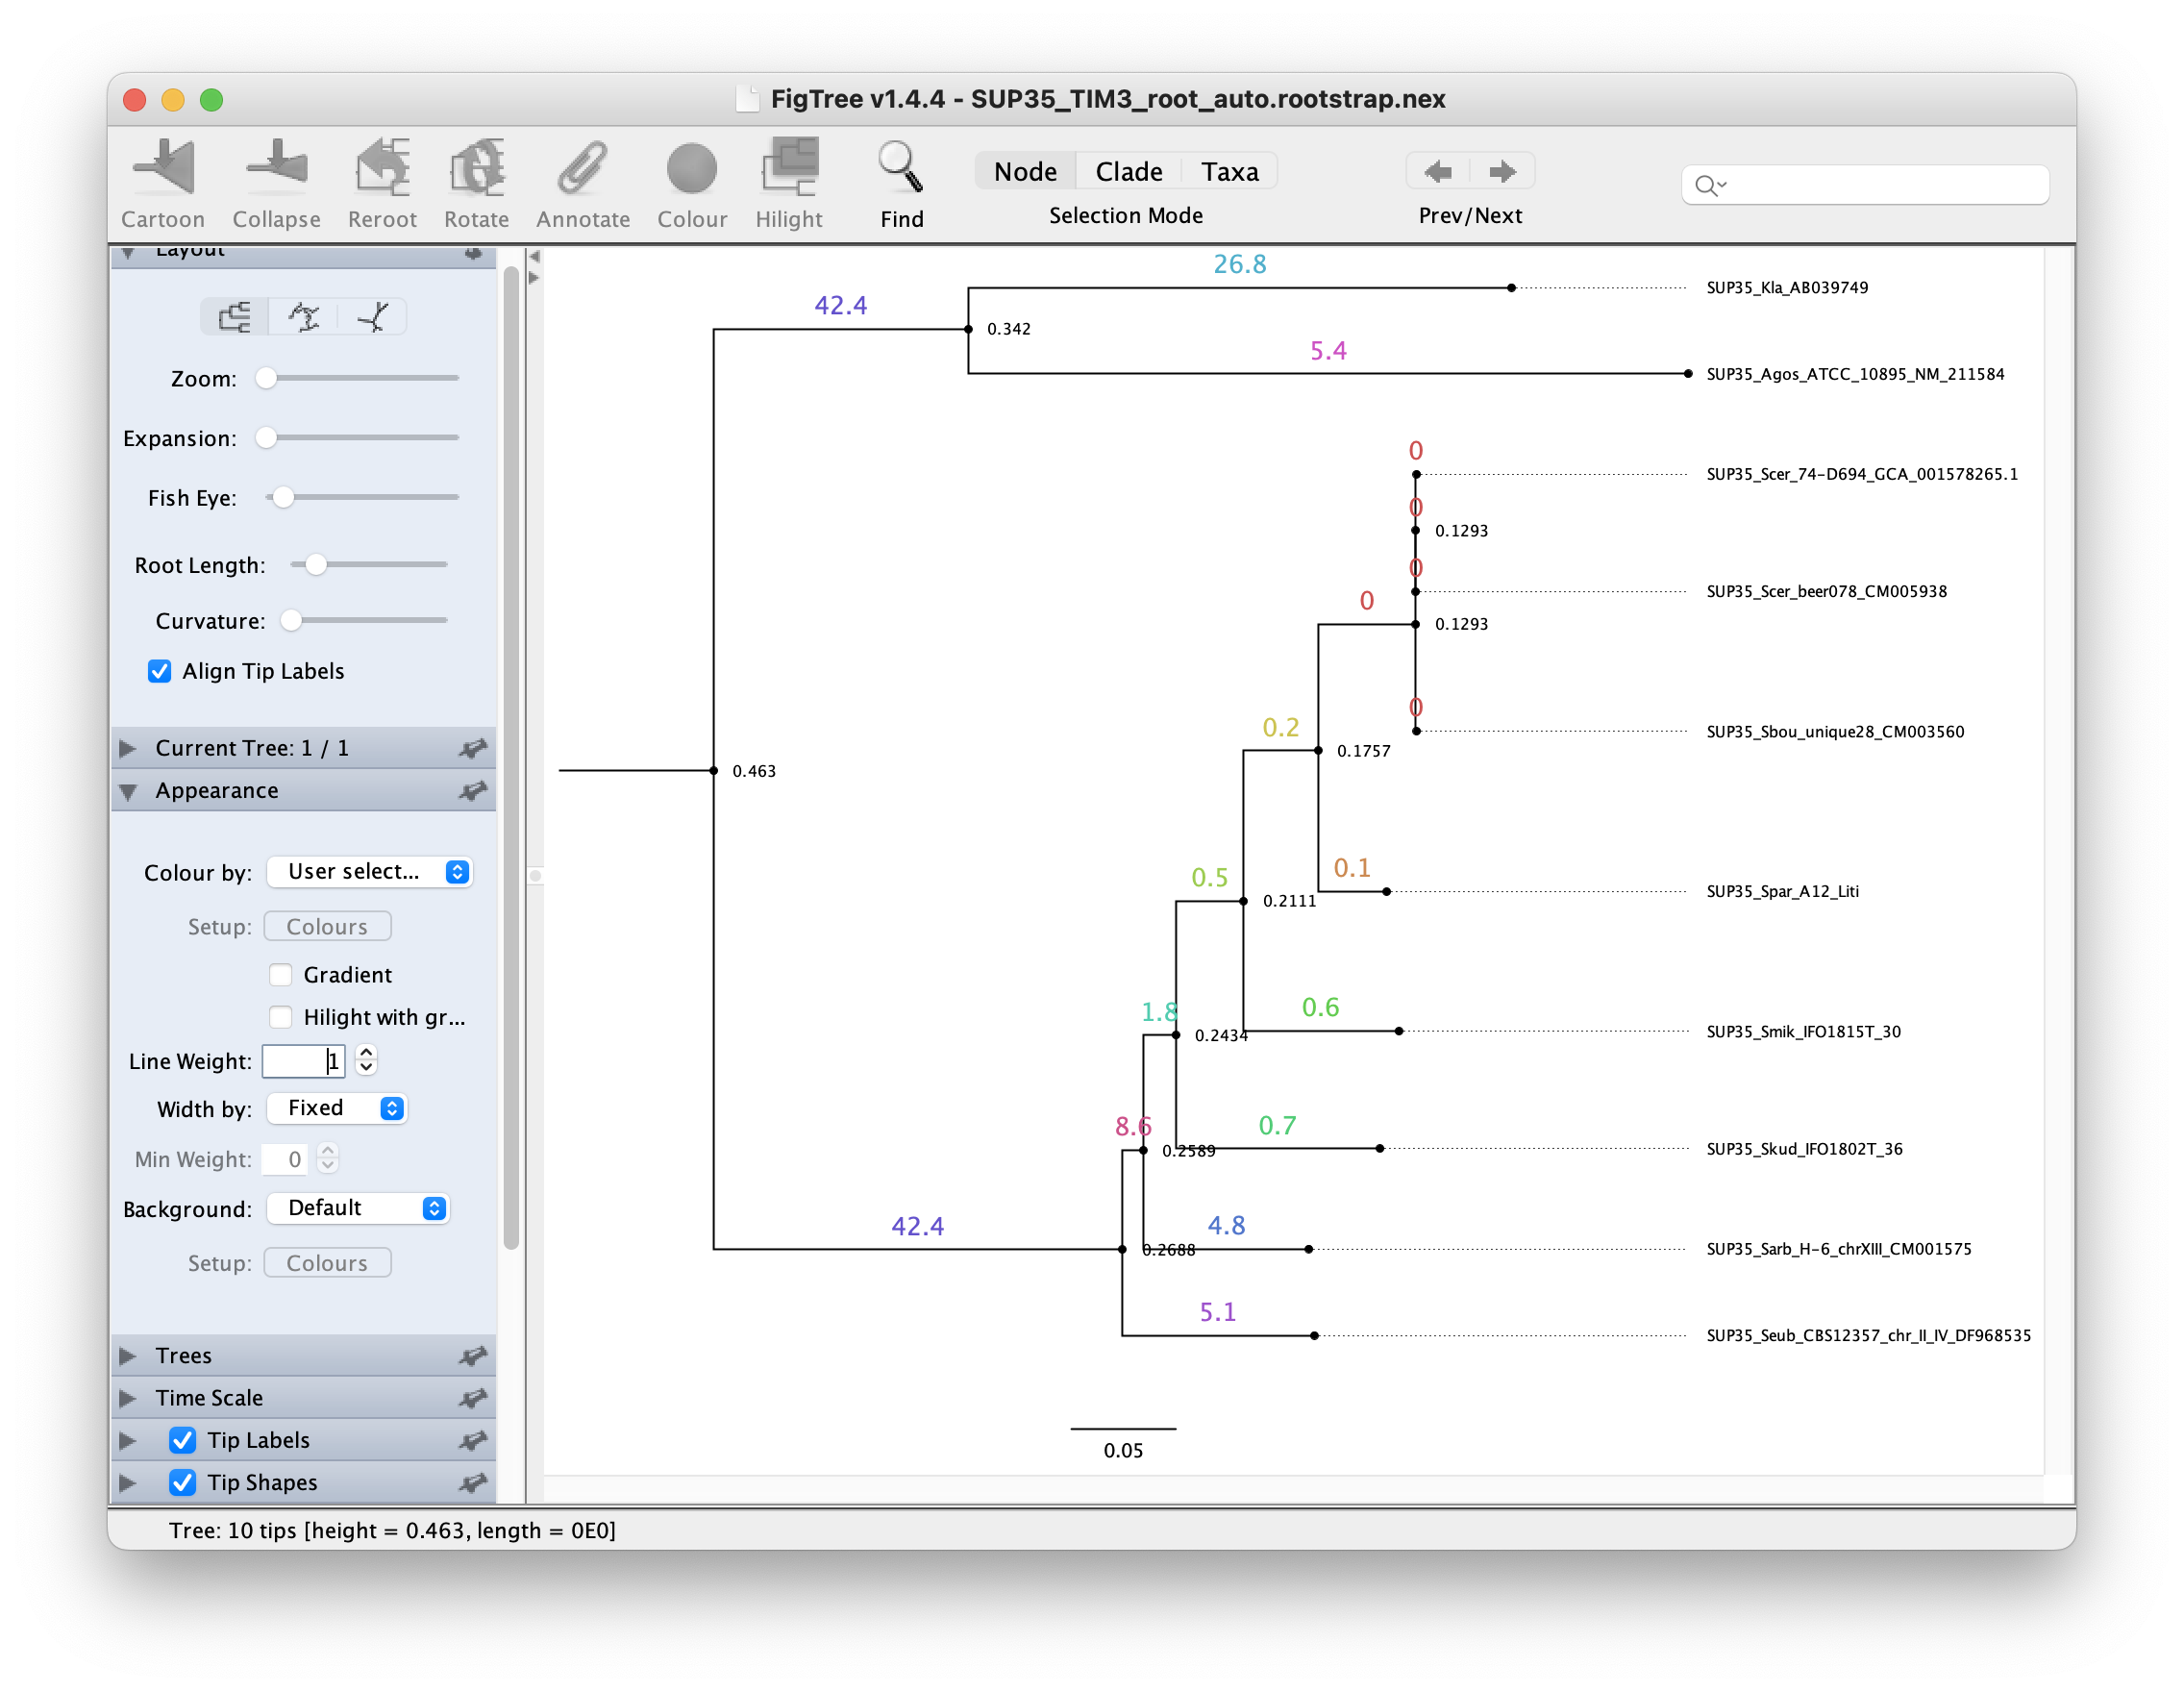

It can't say anything specific about where the tree splits. There's a 42.4% chance the root is either in one place or the other.

## **Part 2 - Dating**

### **5) Analysing the age of the common ancestor of the two species of smoky leopards from the article https://doi.org/10.1016/j.cub.2006.08.066 based on sequencing data of the `atp8` gene region, relying on known data on the frequency of substitutions in mtDNA (approximately 2% per million years) in `beauti` and `beast`**
> - Check the quality in `Tracer`<br>
> - Combine trees in `treeannotator`.<br>
> - Draw the final tree (can be in `FigTree`, bonus for `ggtree`)<br>
> - Be sure to show estimates of the age of the common ancestor at the nodes!<br>

In [9]:
! efetch -db popset -id 126256179 -format fasta >data/atp8/felidae_atp8.fa

In [12]:
! cut -d ' ' -f 1,2,3 data/atp8/felidae_atp8.fa | sed -e 's/ /_/g' > data/atp8/felidae_atp8.renamed.fa

In [ ]:
! mafft --auto data/atp8/felidae_atp8.renamed.fa >data/atp8/felidae_atp8.aln

In [17]:
! trimal -in data/atp8/felidae_atp8.aln -out data/atp8/felidae_atp8.trim.fas -nogaps

In [ ]:
! iqtree2 -s data/atp8/felidae_atp8.trim.fas -o EF437591.1_Felis_catus -alrt 1000 -abayes

In [22]:
from Bio import Phylo

In [25]:
tree = Phylo.read("data/atp8/felidae_atp8.trim.fas.treefile", "newick")

In [28]:
Phylo.draw_ascii(tree)

                                          , EF437567.1_Neofelis_nebulosa
                                          |
                                          | EF437569.1_Neofelis_nebulosa
                                          |
                                          | EF437570.1_Neofelis_nebulosa
                                          |
                                   _______| EF437568.1_Neofelis_nebulosa
                                  |       |
  ________________________________|       |_ EF437571.1_Neofelis_nebulosa
 |                                |
 |                                |            , EF437572.1_Neofelis_diardi
 |                                |____________|
 |                                             | EF437573.1_Neofelis_diardi
 |
 |                             __ EF437581.1_Panthera_onca
 |                           ,|
_|                      _____||____ EF437587.1_Panthera_tigris
 |                     |     |
 |            _________|     |___

The outside group is the house cat. Because everyone else is a big cat.<br>
Fundamentally our tree is similar to that published in articles.<br>
In foreign colleagues the tree was based on several genes, we take only 1 piece of data.<br>

**Beauti**

`Beauti` is the GUI application. So I will just provide as many screenshots as possible.

![Screenshot 2024-03-07 at 21.59.15.png](<attachment:Screenshot 2024-03-07 at 21.59.15.png>)

When loading the file, we select that we have nucleotide sequences

![Screenshot 2024-03-07 at 21.59.21.png](<attachment:Screenshot 2024-03-07 at 21.59.21.png>)

Everything is okay.

![Screenshot 2024-03-07 at 22.01.40.png](<attachment:Screenshot 2024-03-07 at 22.01.40.png>)

In `Site model` select TN93 and empirical frequencies

![Screenshot 2024-03-07 at 22.02.46.png](<attachment:Screenshot 2024-03-07 at 22.02.46.png>)

In `Clock model` we choose 0.02. Why? Because we rely on the known data on the frequency of substitutions in mtDNA (approximately 2% per million years)

![Screenshot 2024-03-07 at 22.06.15.png](<attachment:Screenshot 2024-03-07 at 22.06.15.png>)

Everything is okay.

![Screenshot 2024-03-07 at 22.07.12.png](<attachment:Screenshot 2024-03-07 at 22.07.12.png>)

Save everything to `felidae_2percent.xml`.
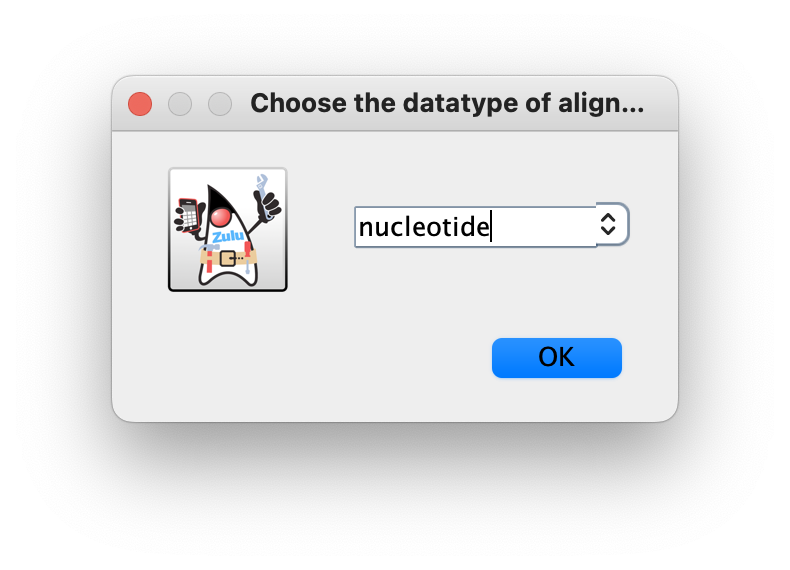
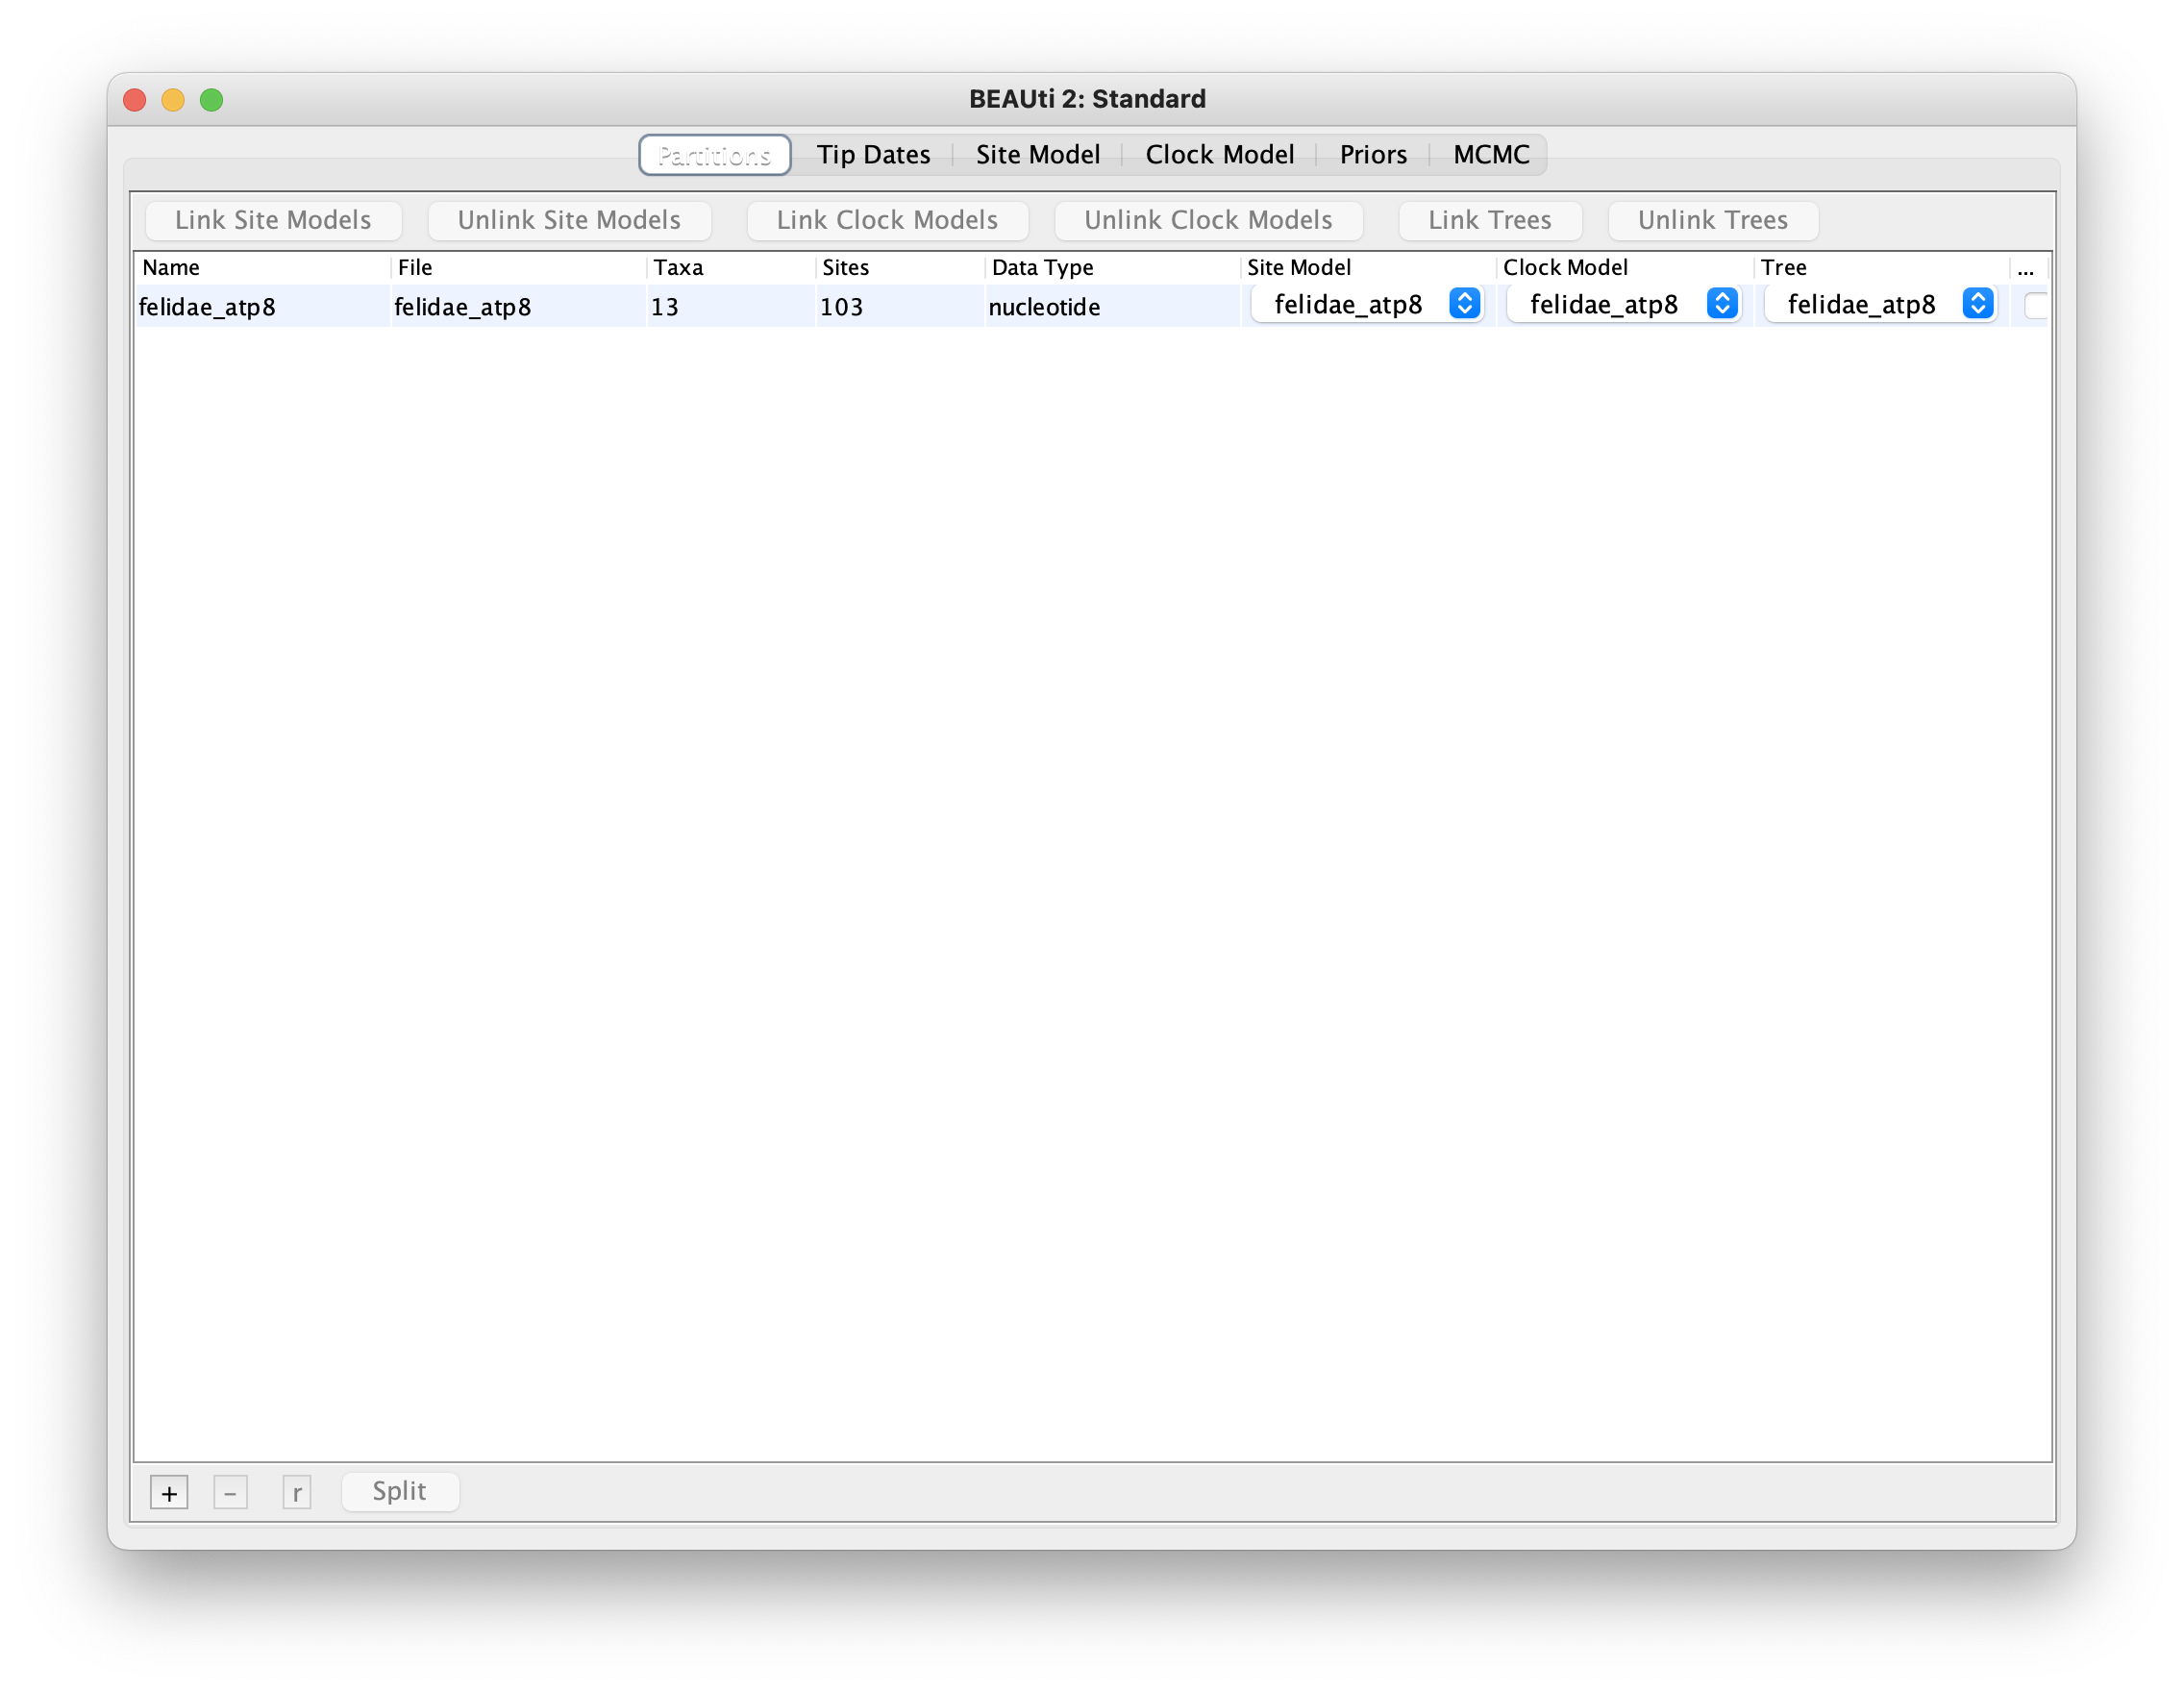
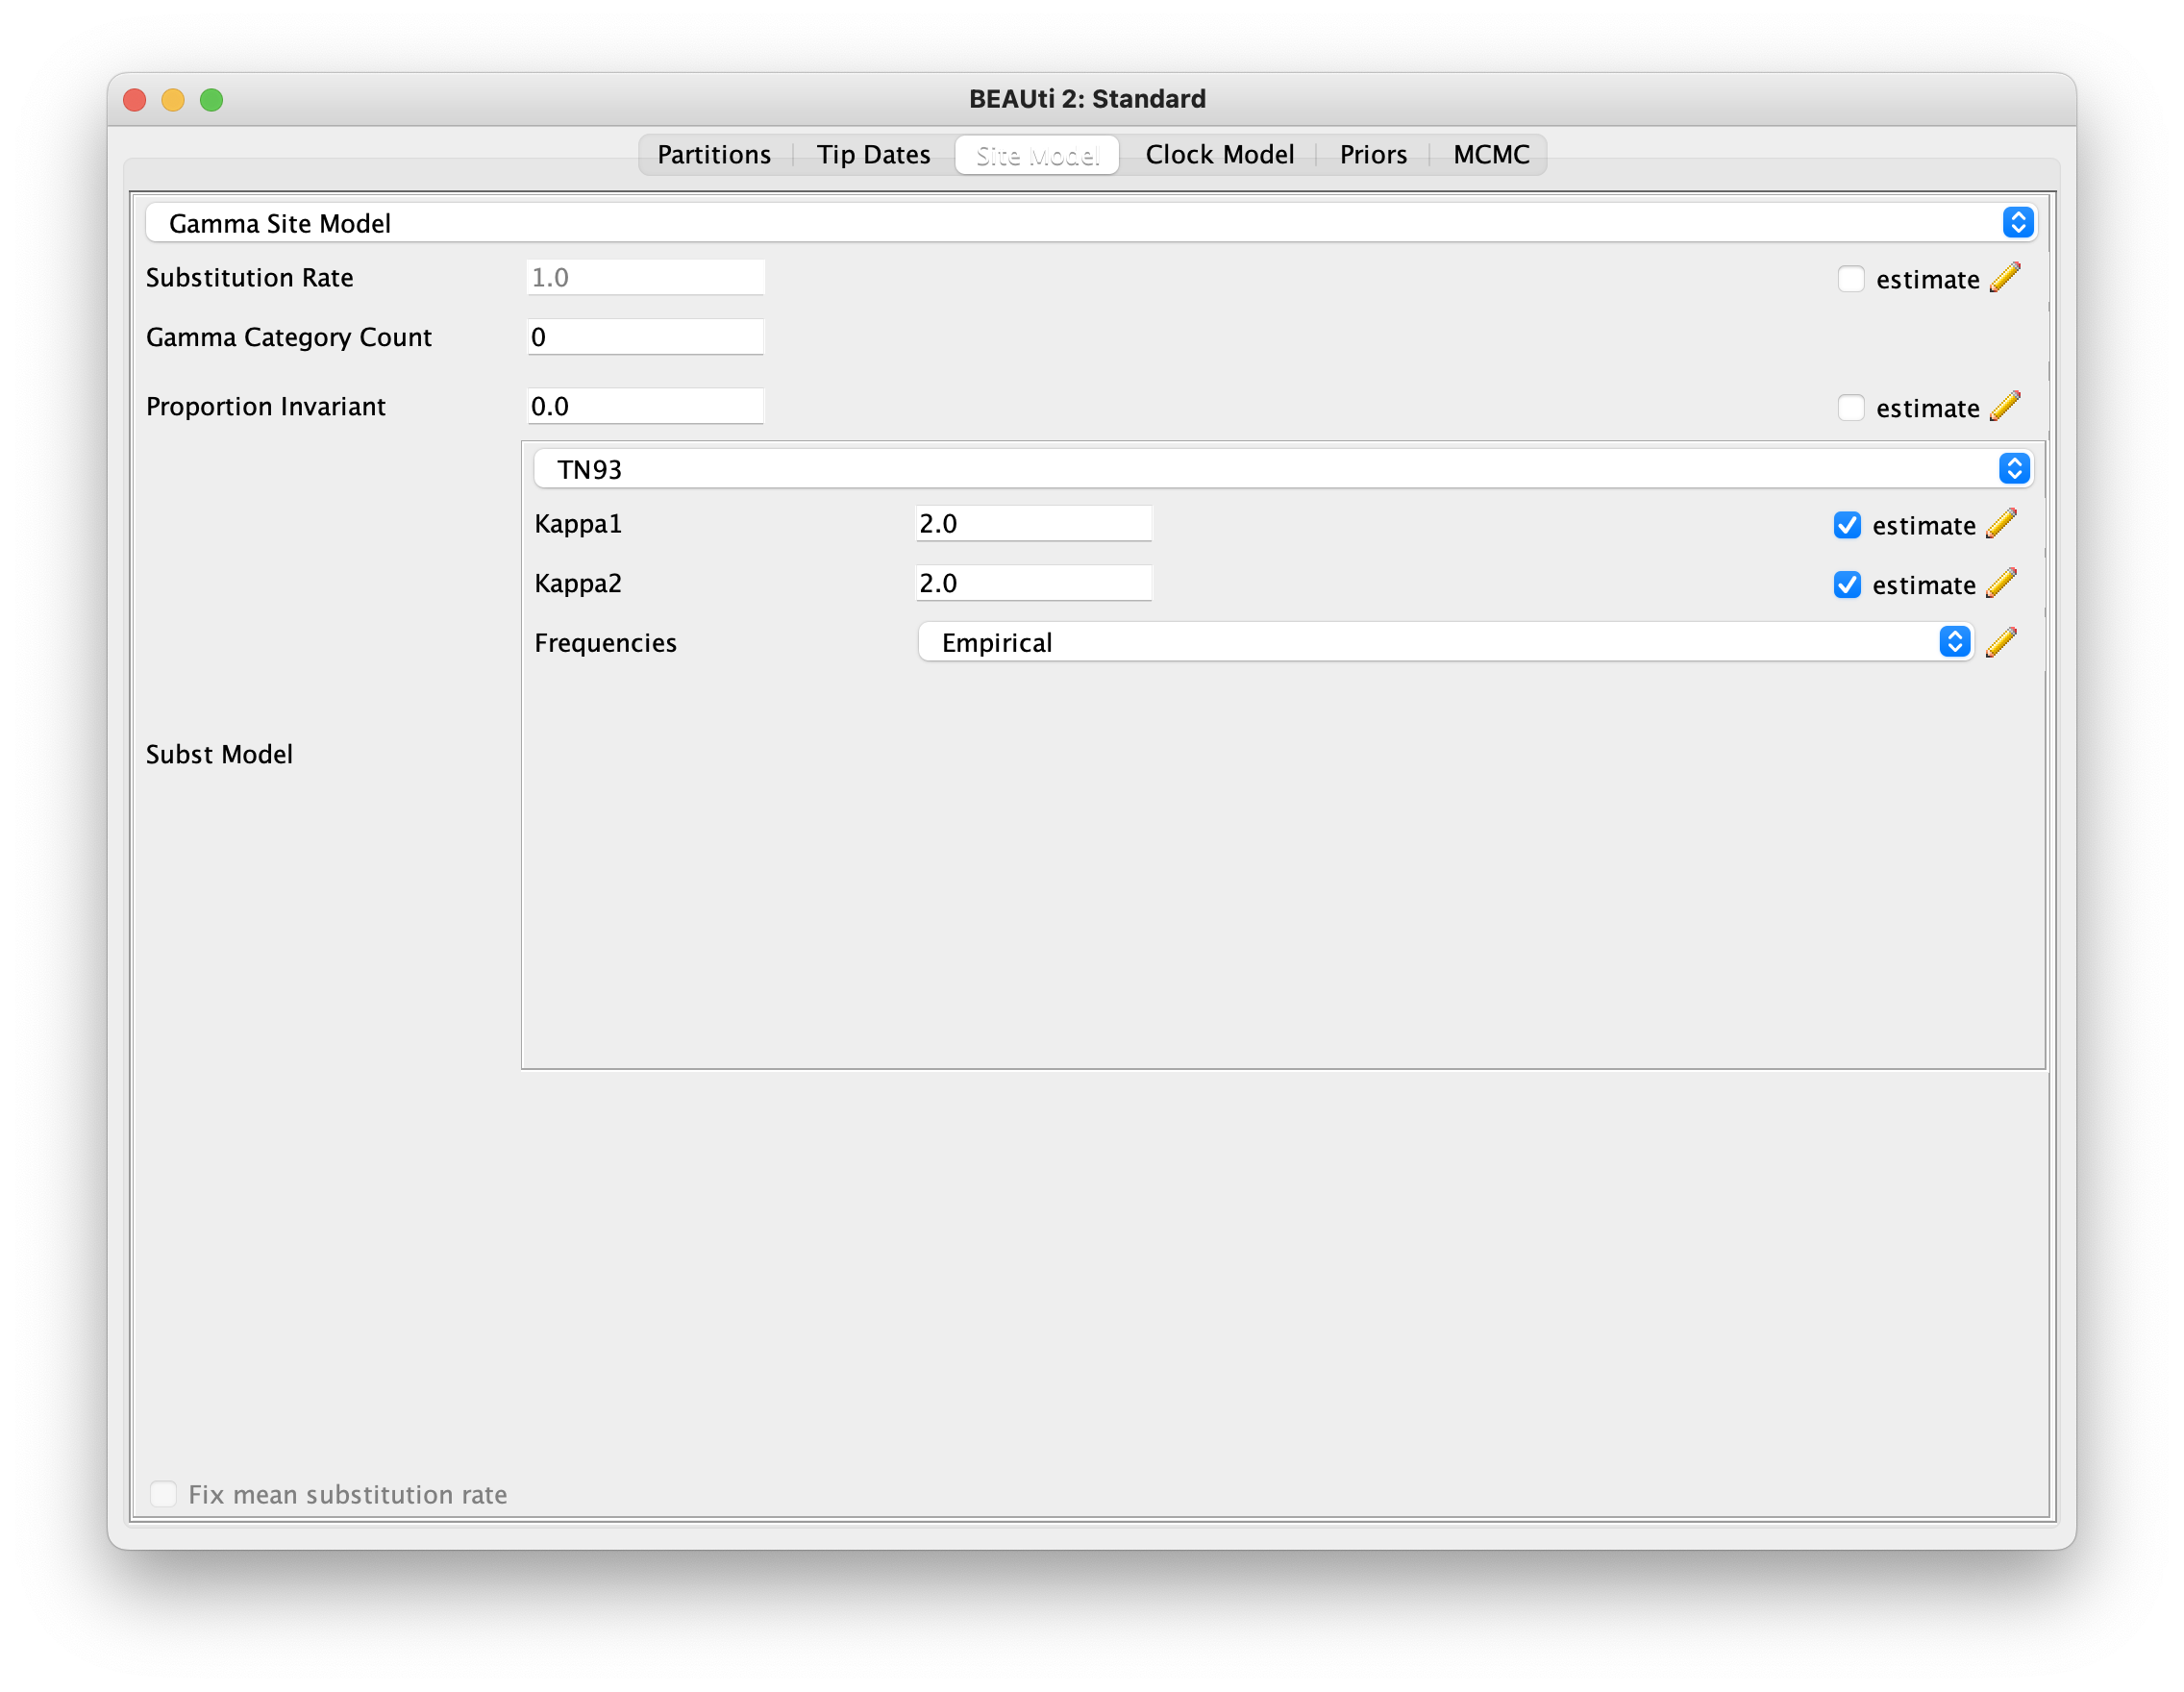
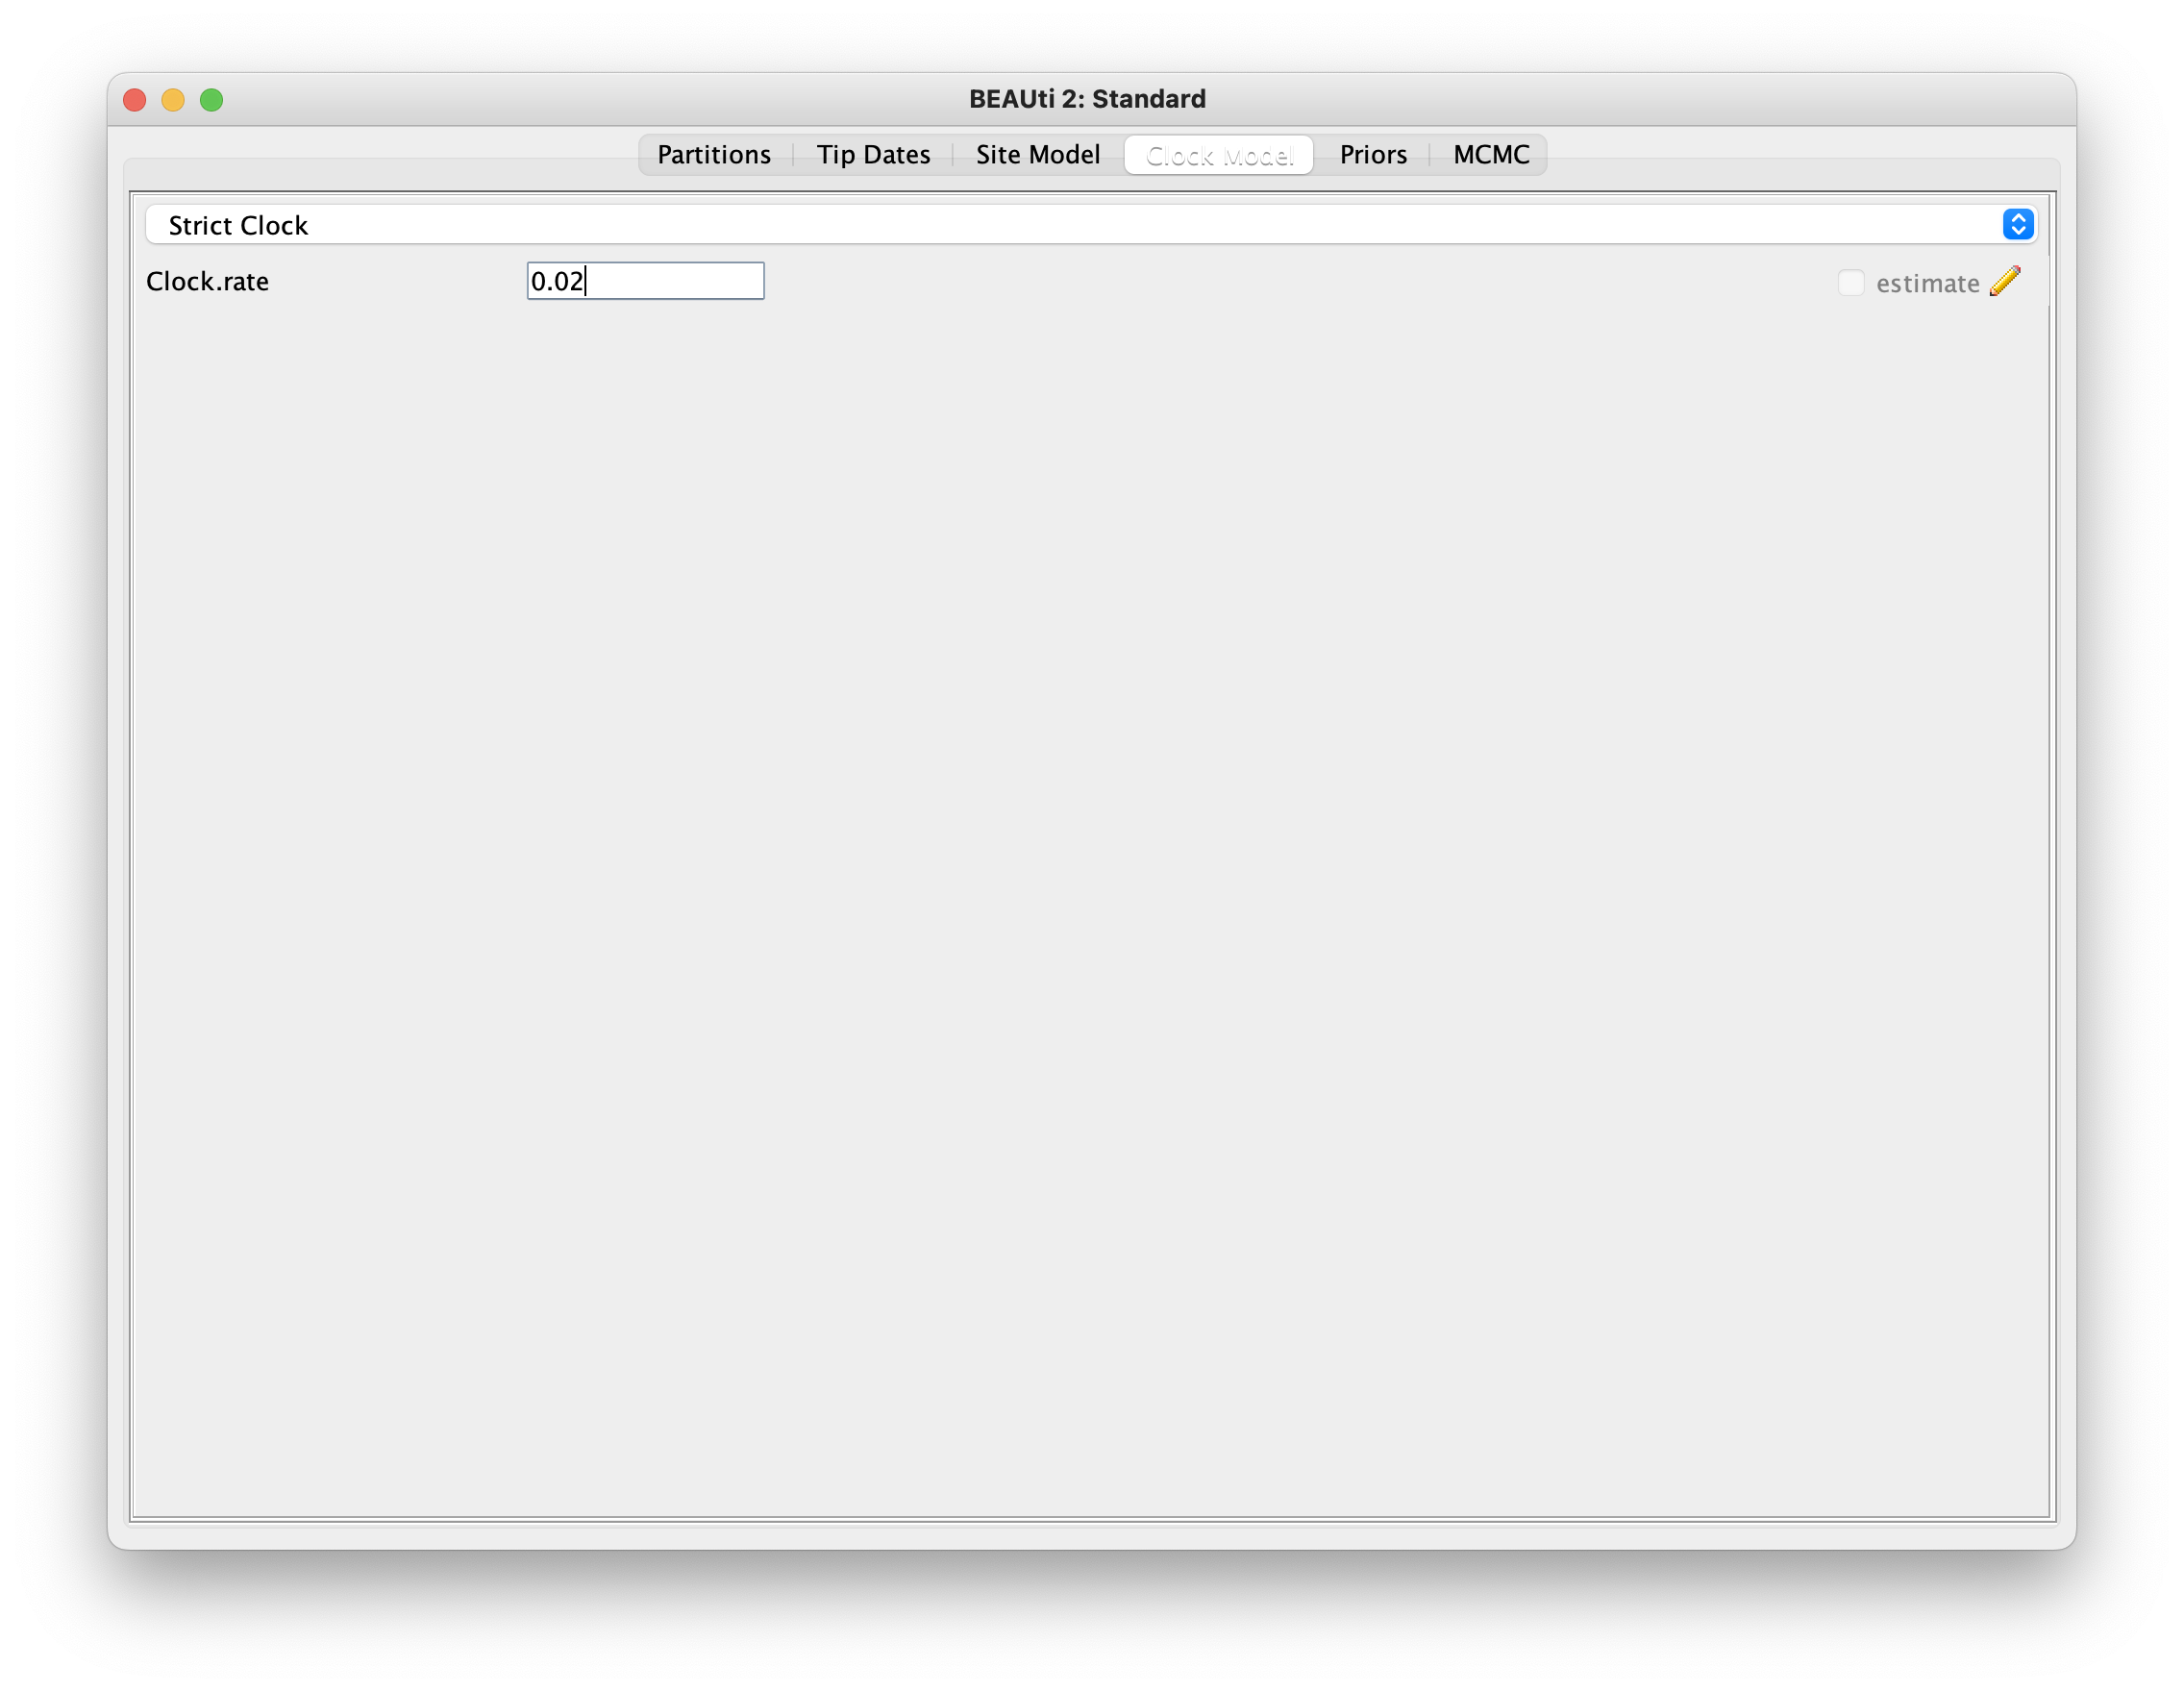
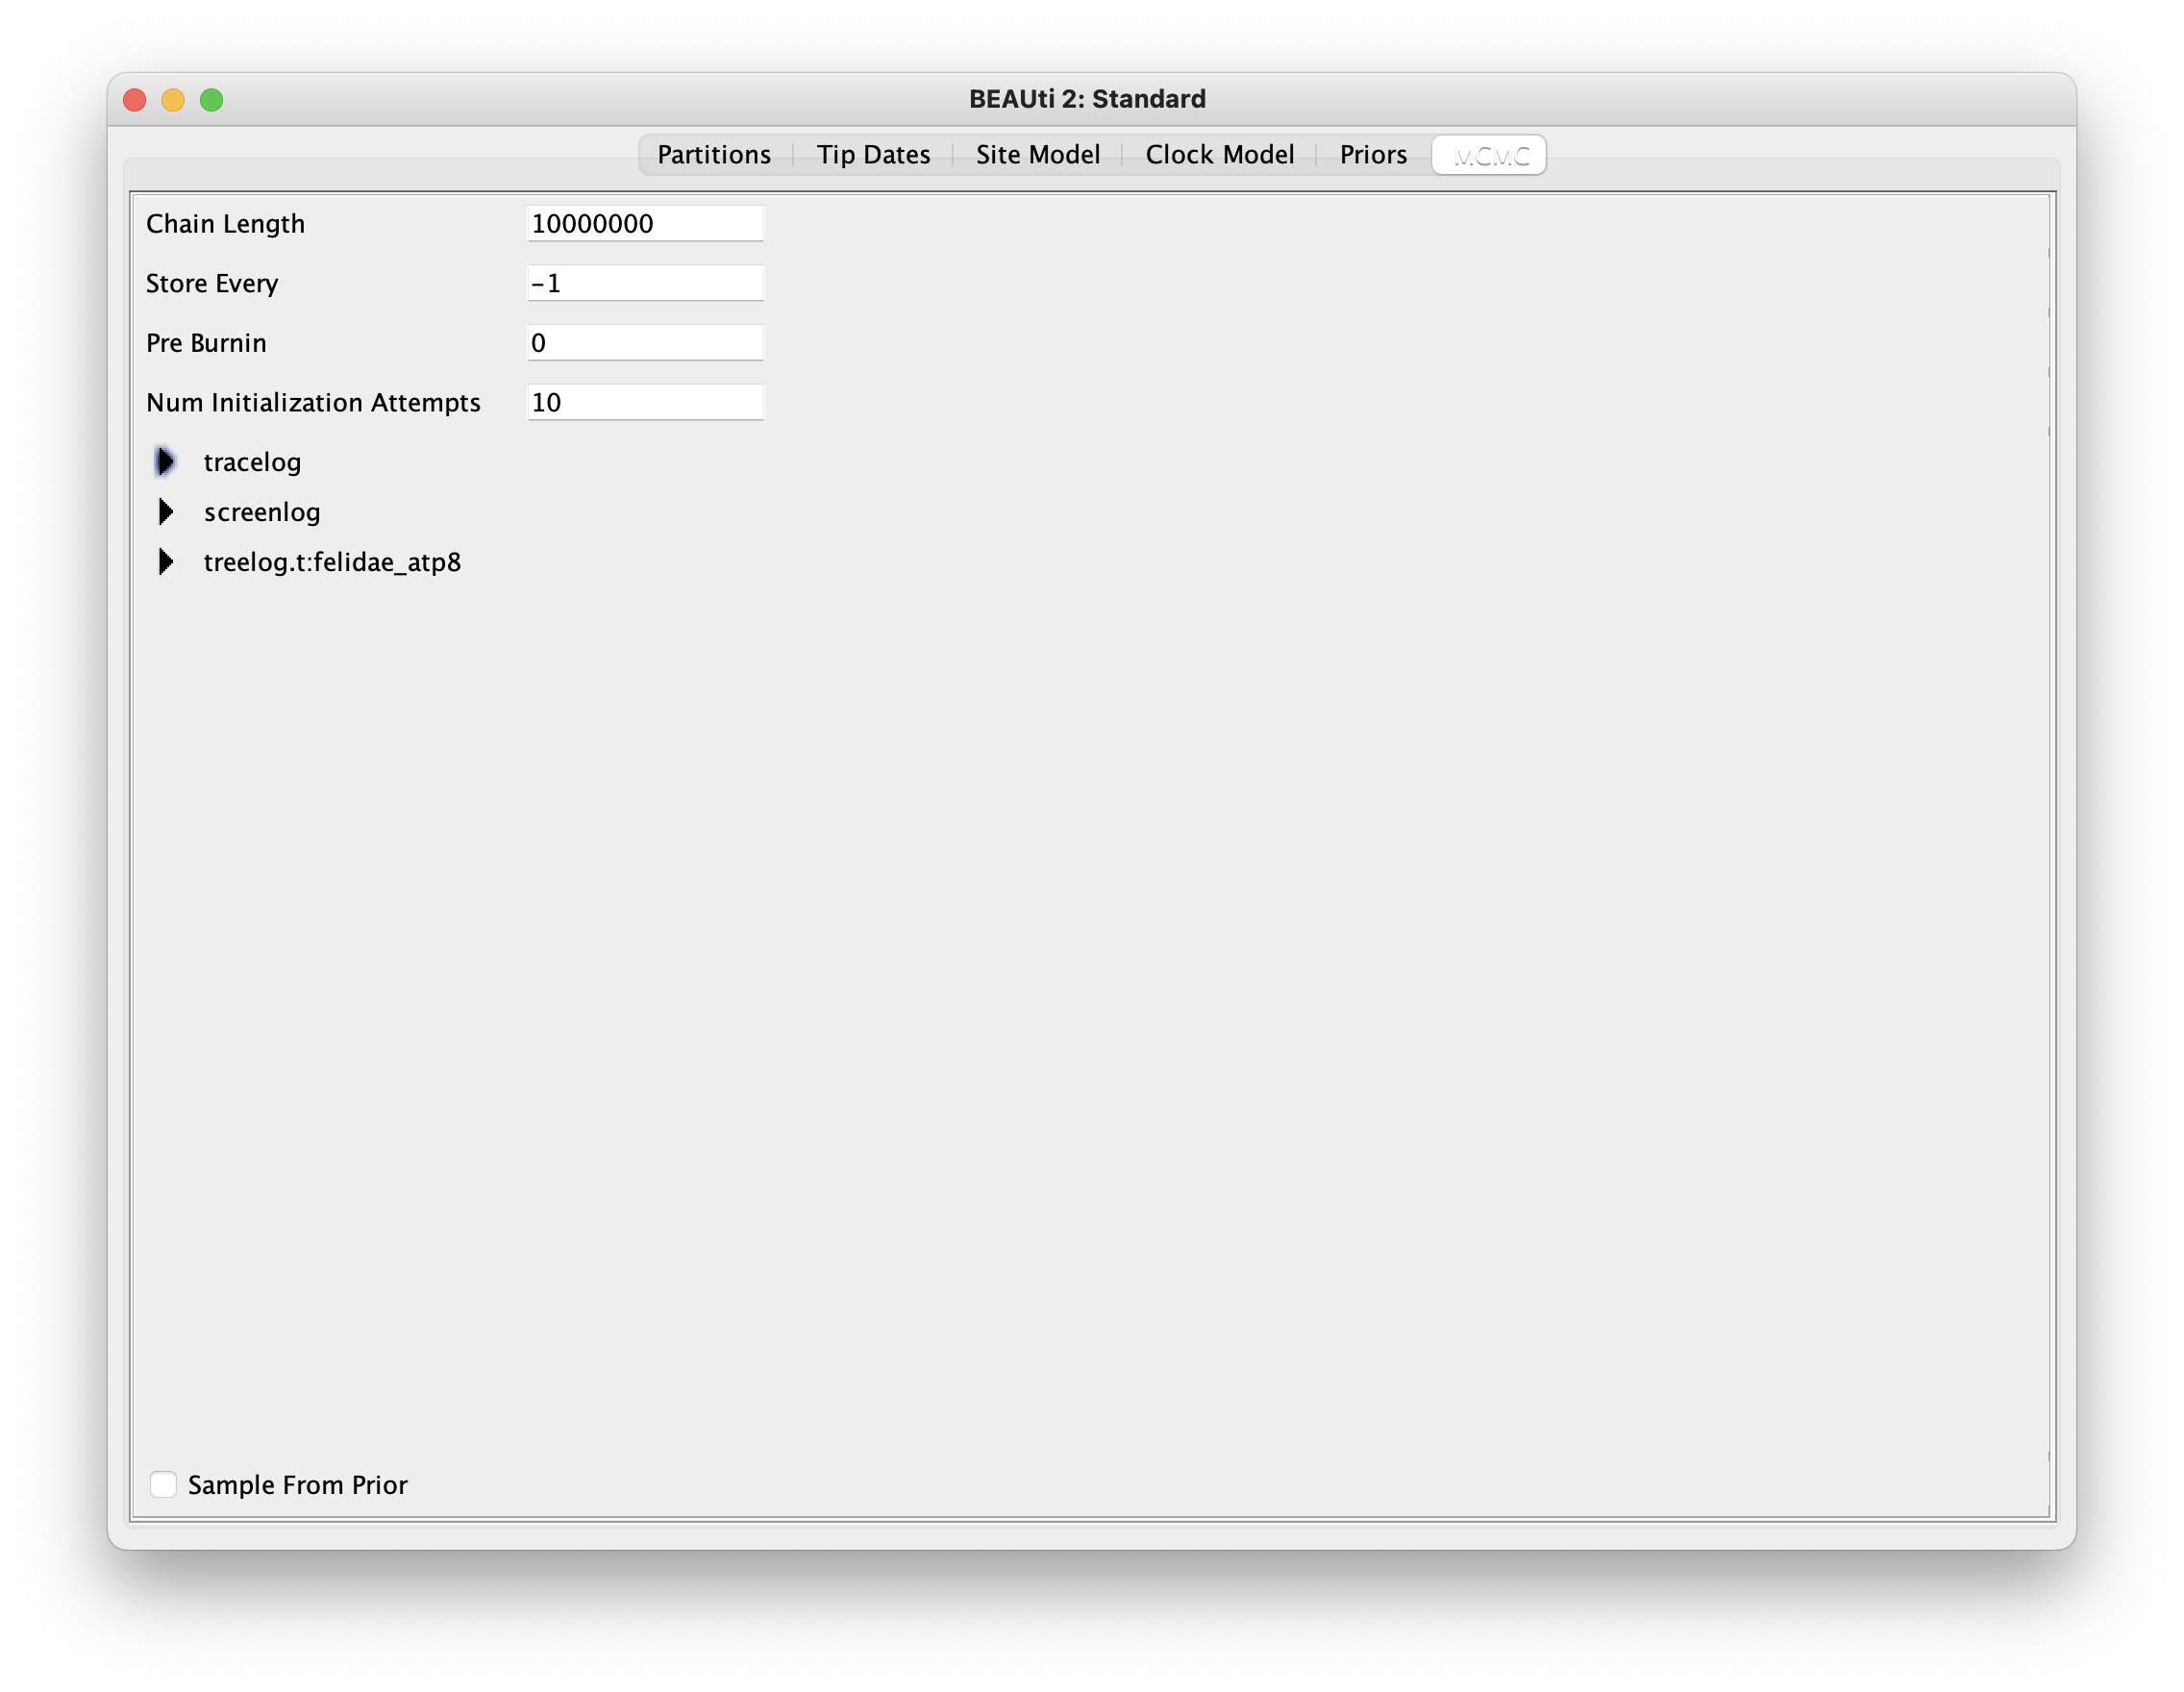
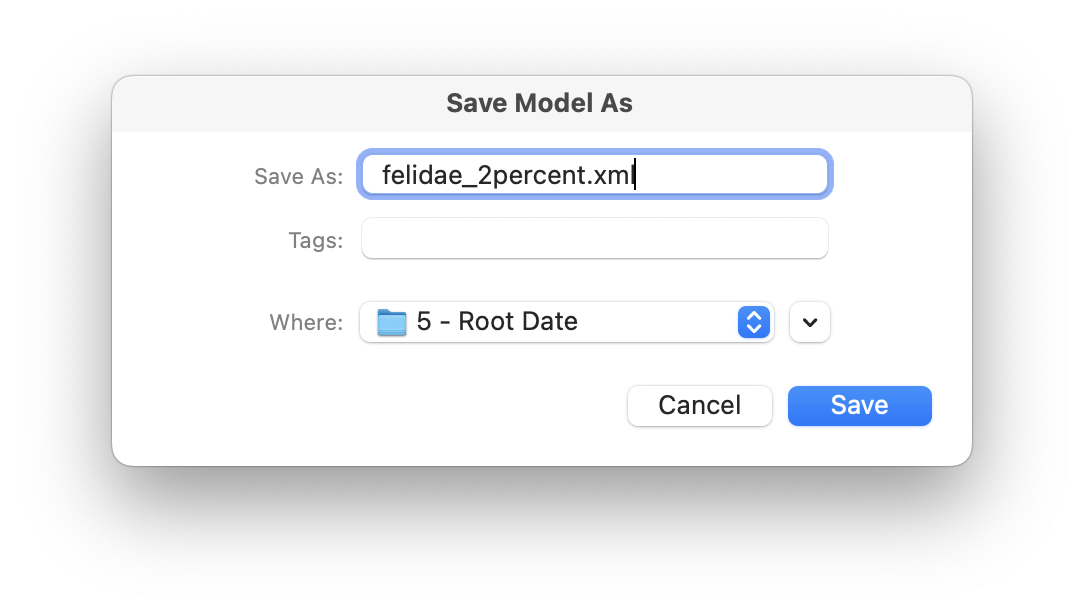

In [ ]:
! beast data/atp8/felidae_2percent.xml

**Tracer**

`Tracer` is the GUI application. So I will just provide as many screenshots as possible.

![Screenshot 2024-03-07 at 22.37.25.png](<attachment:Screenshot 2024-03-07 at 22.37.25.png>)

All `ESS` scores are in perfect order.

![Screenshot 2024-03-07 at 22.38.23.png](<attachment:Screenshot 2024-03-07 at 22.38.23.png>)

The so-called "hairy caterpillar".
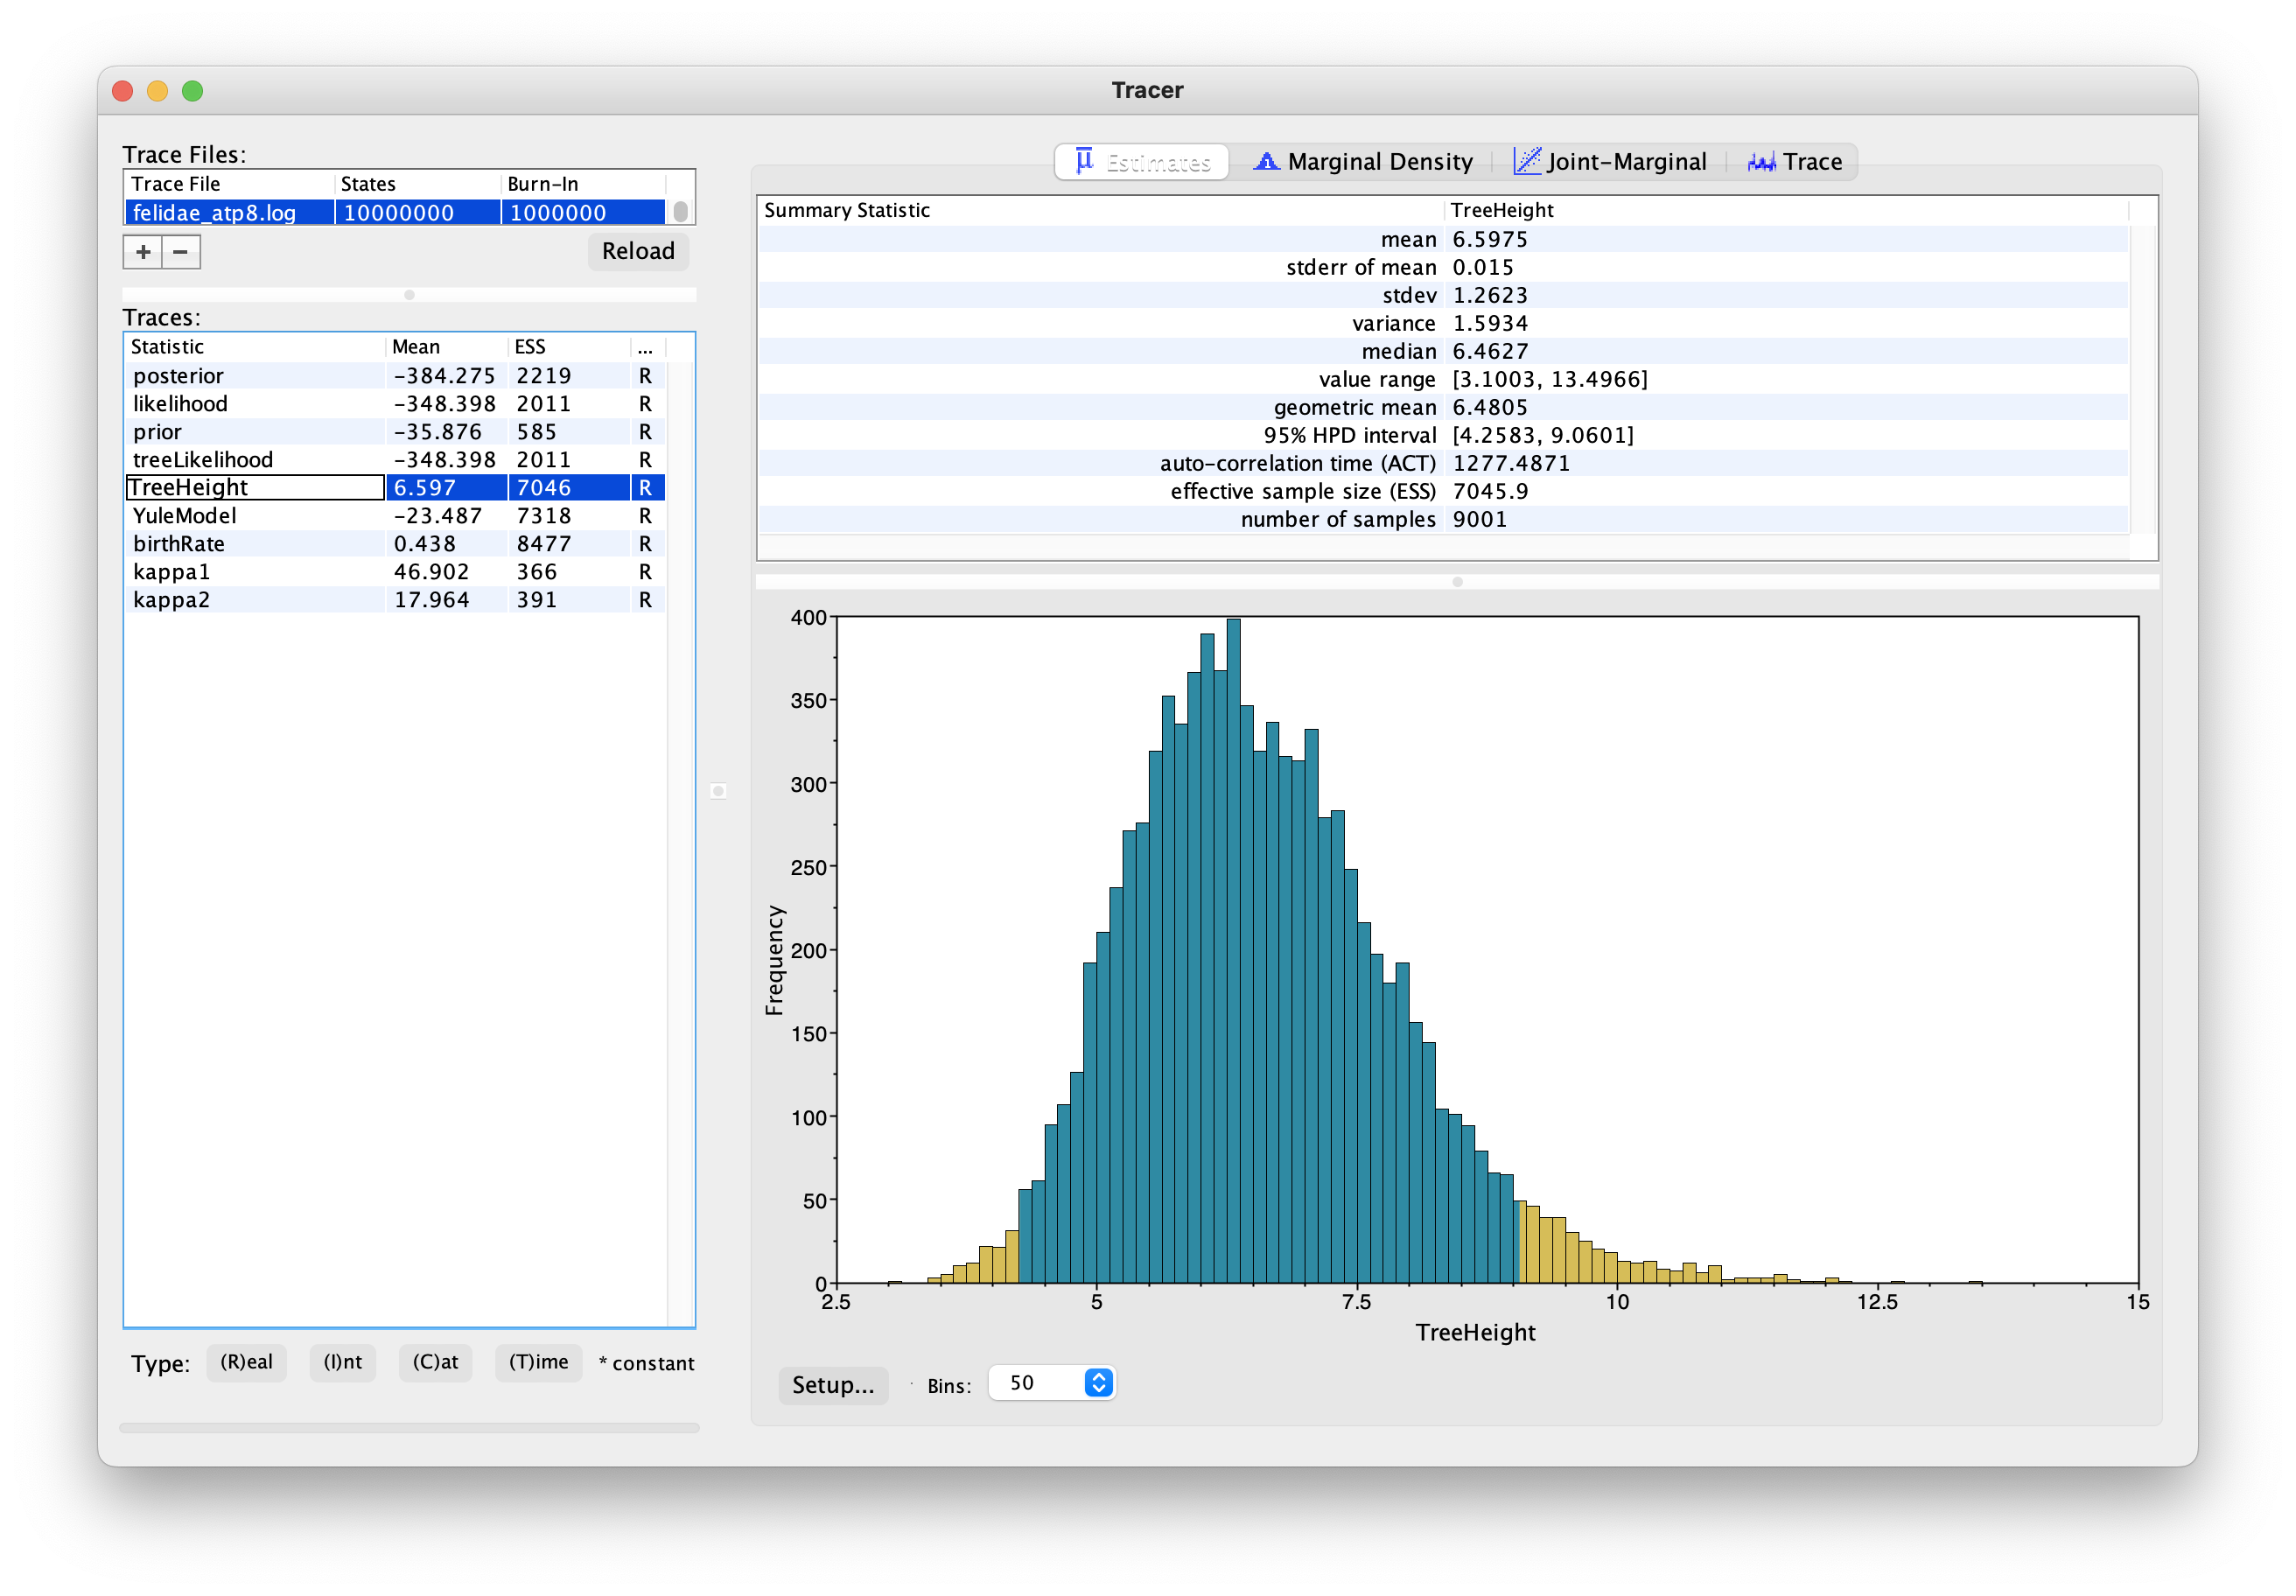
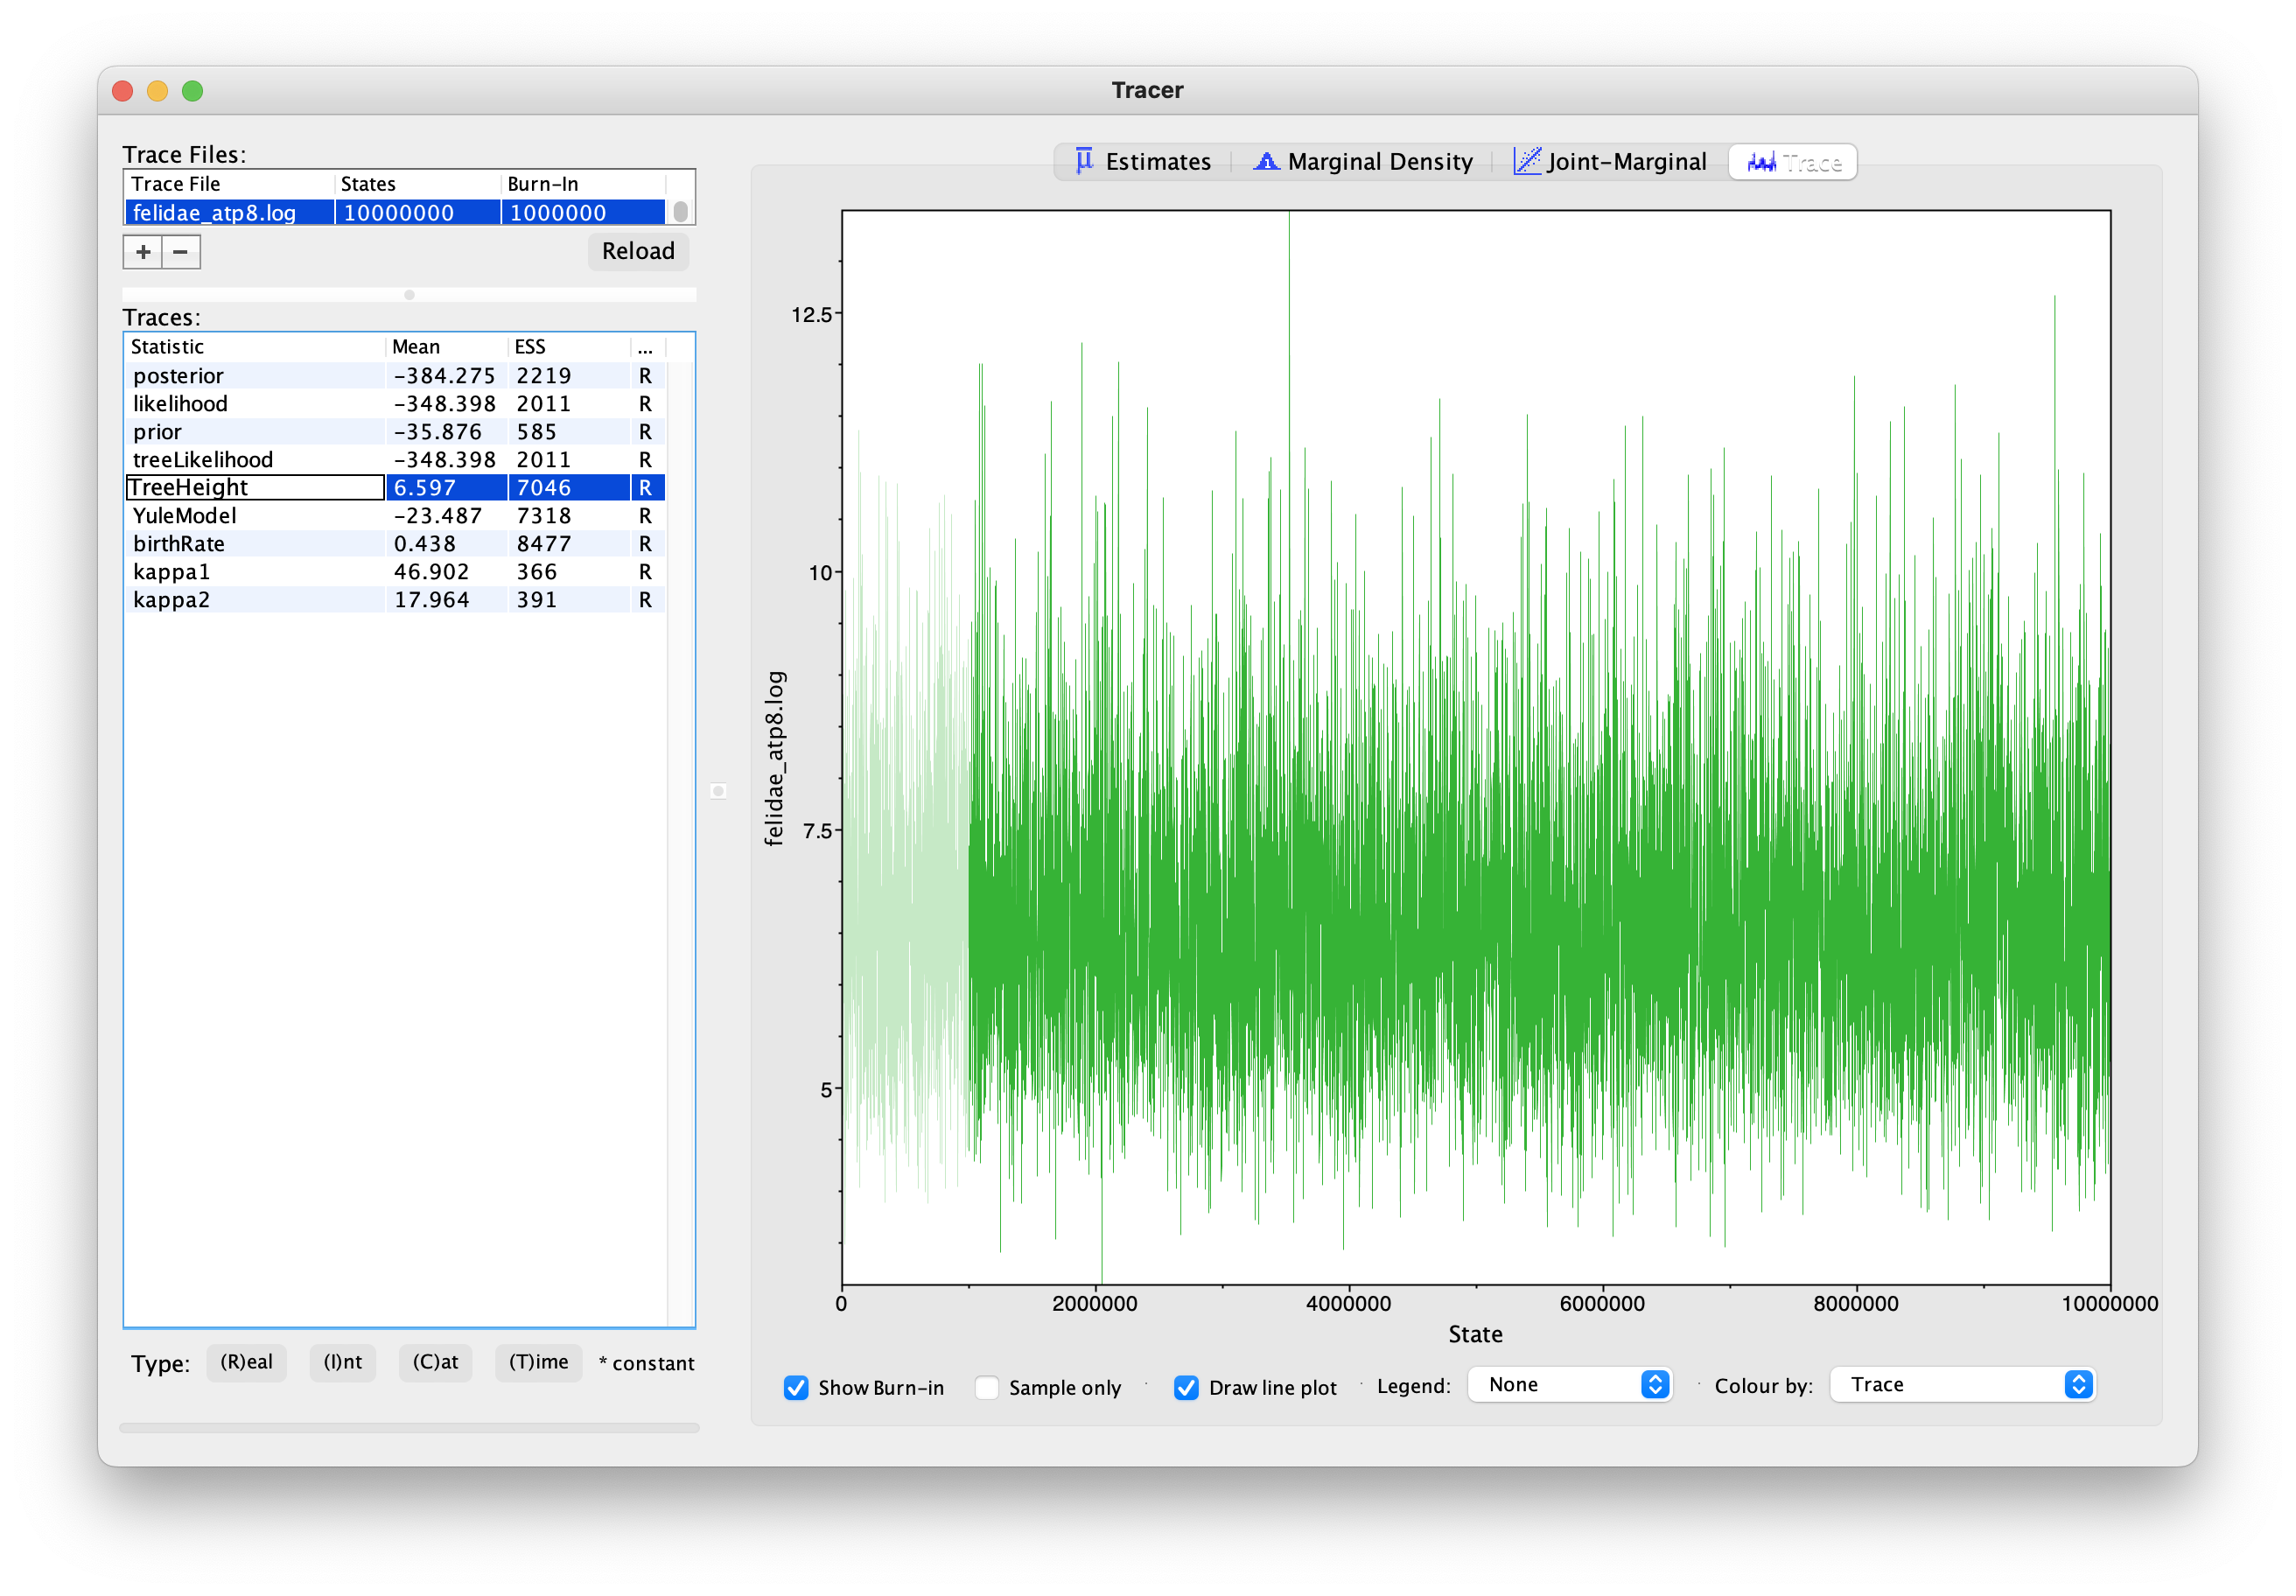

**TreeAnnotator**

`TreeAnnotator` is the GUI application. So I will just provide as many screenshots as possible.

![Screenshot 2024-03-07 at 22.51.48.png](<attachment:Screenshot 2024-03-07 at 22.51.48.png>)

Set parameters, and set `input` and `output`. Useful hint - output can be named the same way, but not .trees, just .tree!
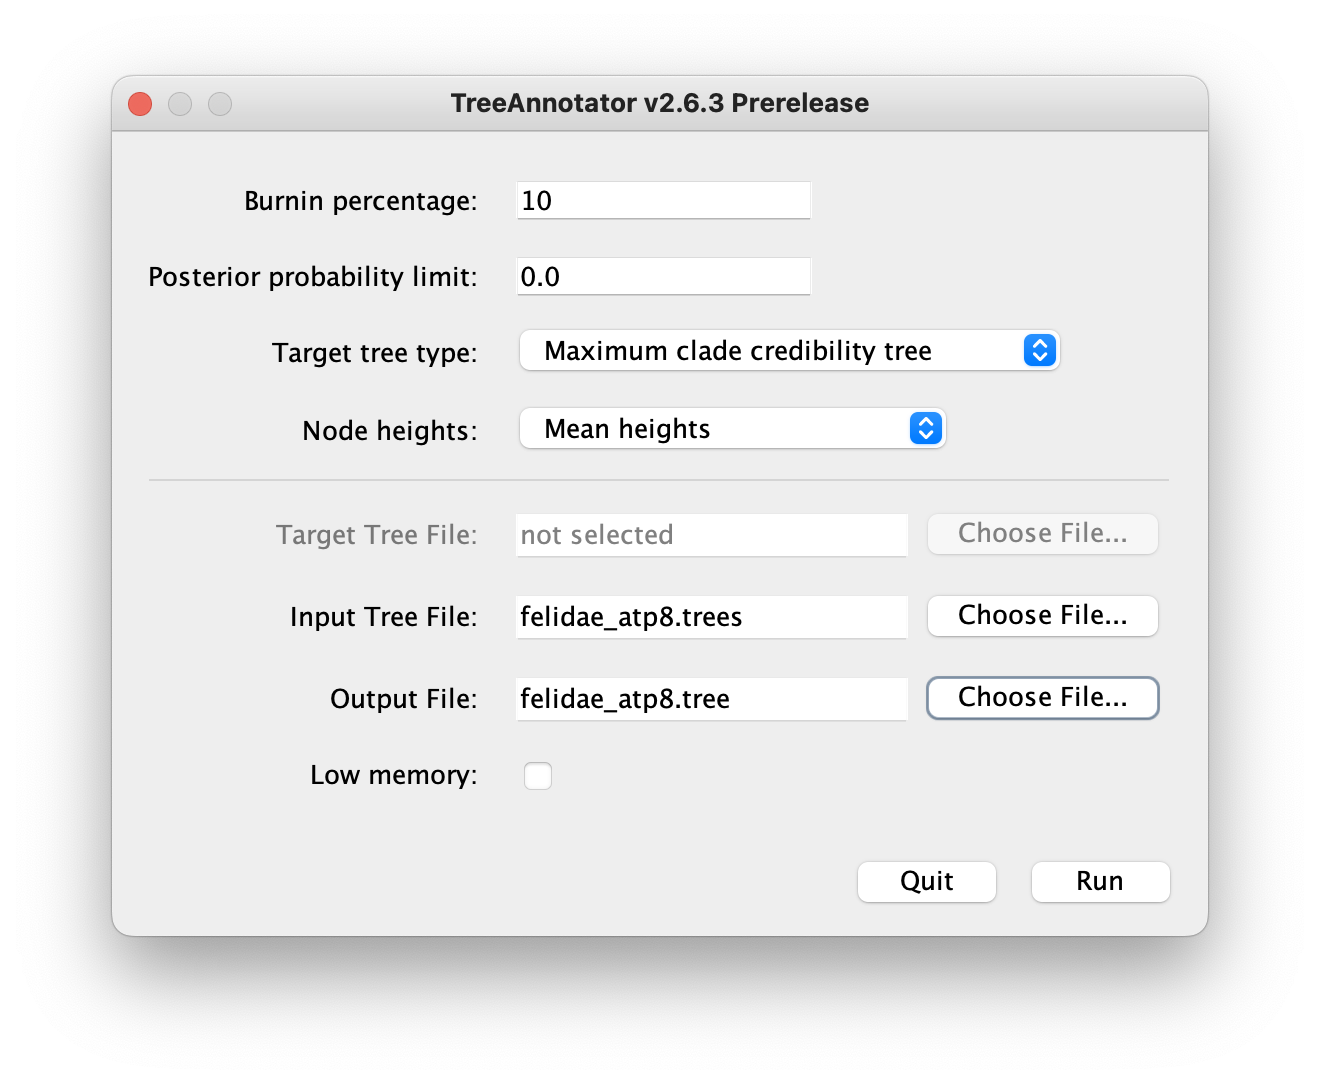

**FigTree**

`FigTree` is the GUI application. So I will just provide as many screenshots as possible.

![Screenshot 2024-03-07 at 22.59.15.png](<attachment:Screenshot 2024-03-07 at 22.59.15.png>)

Fiddled with the parameters and got these results
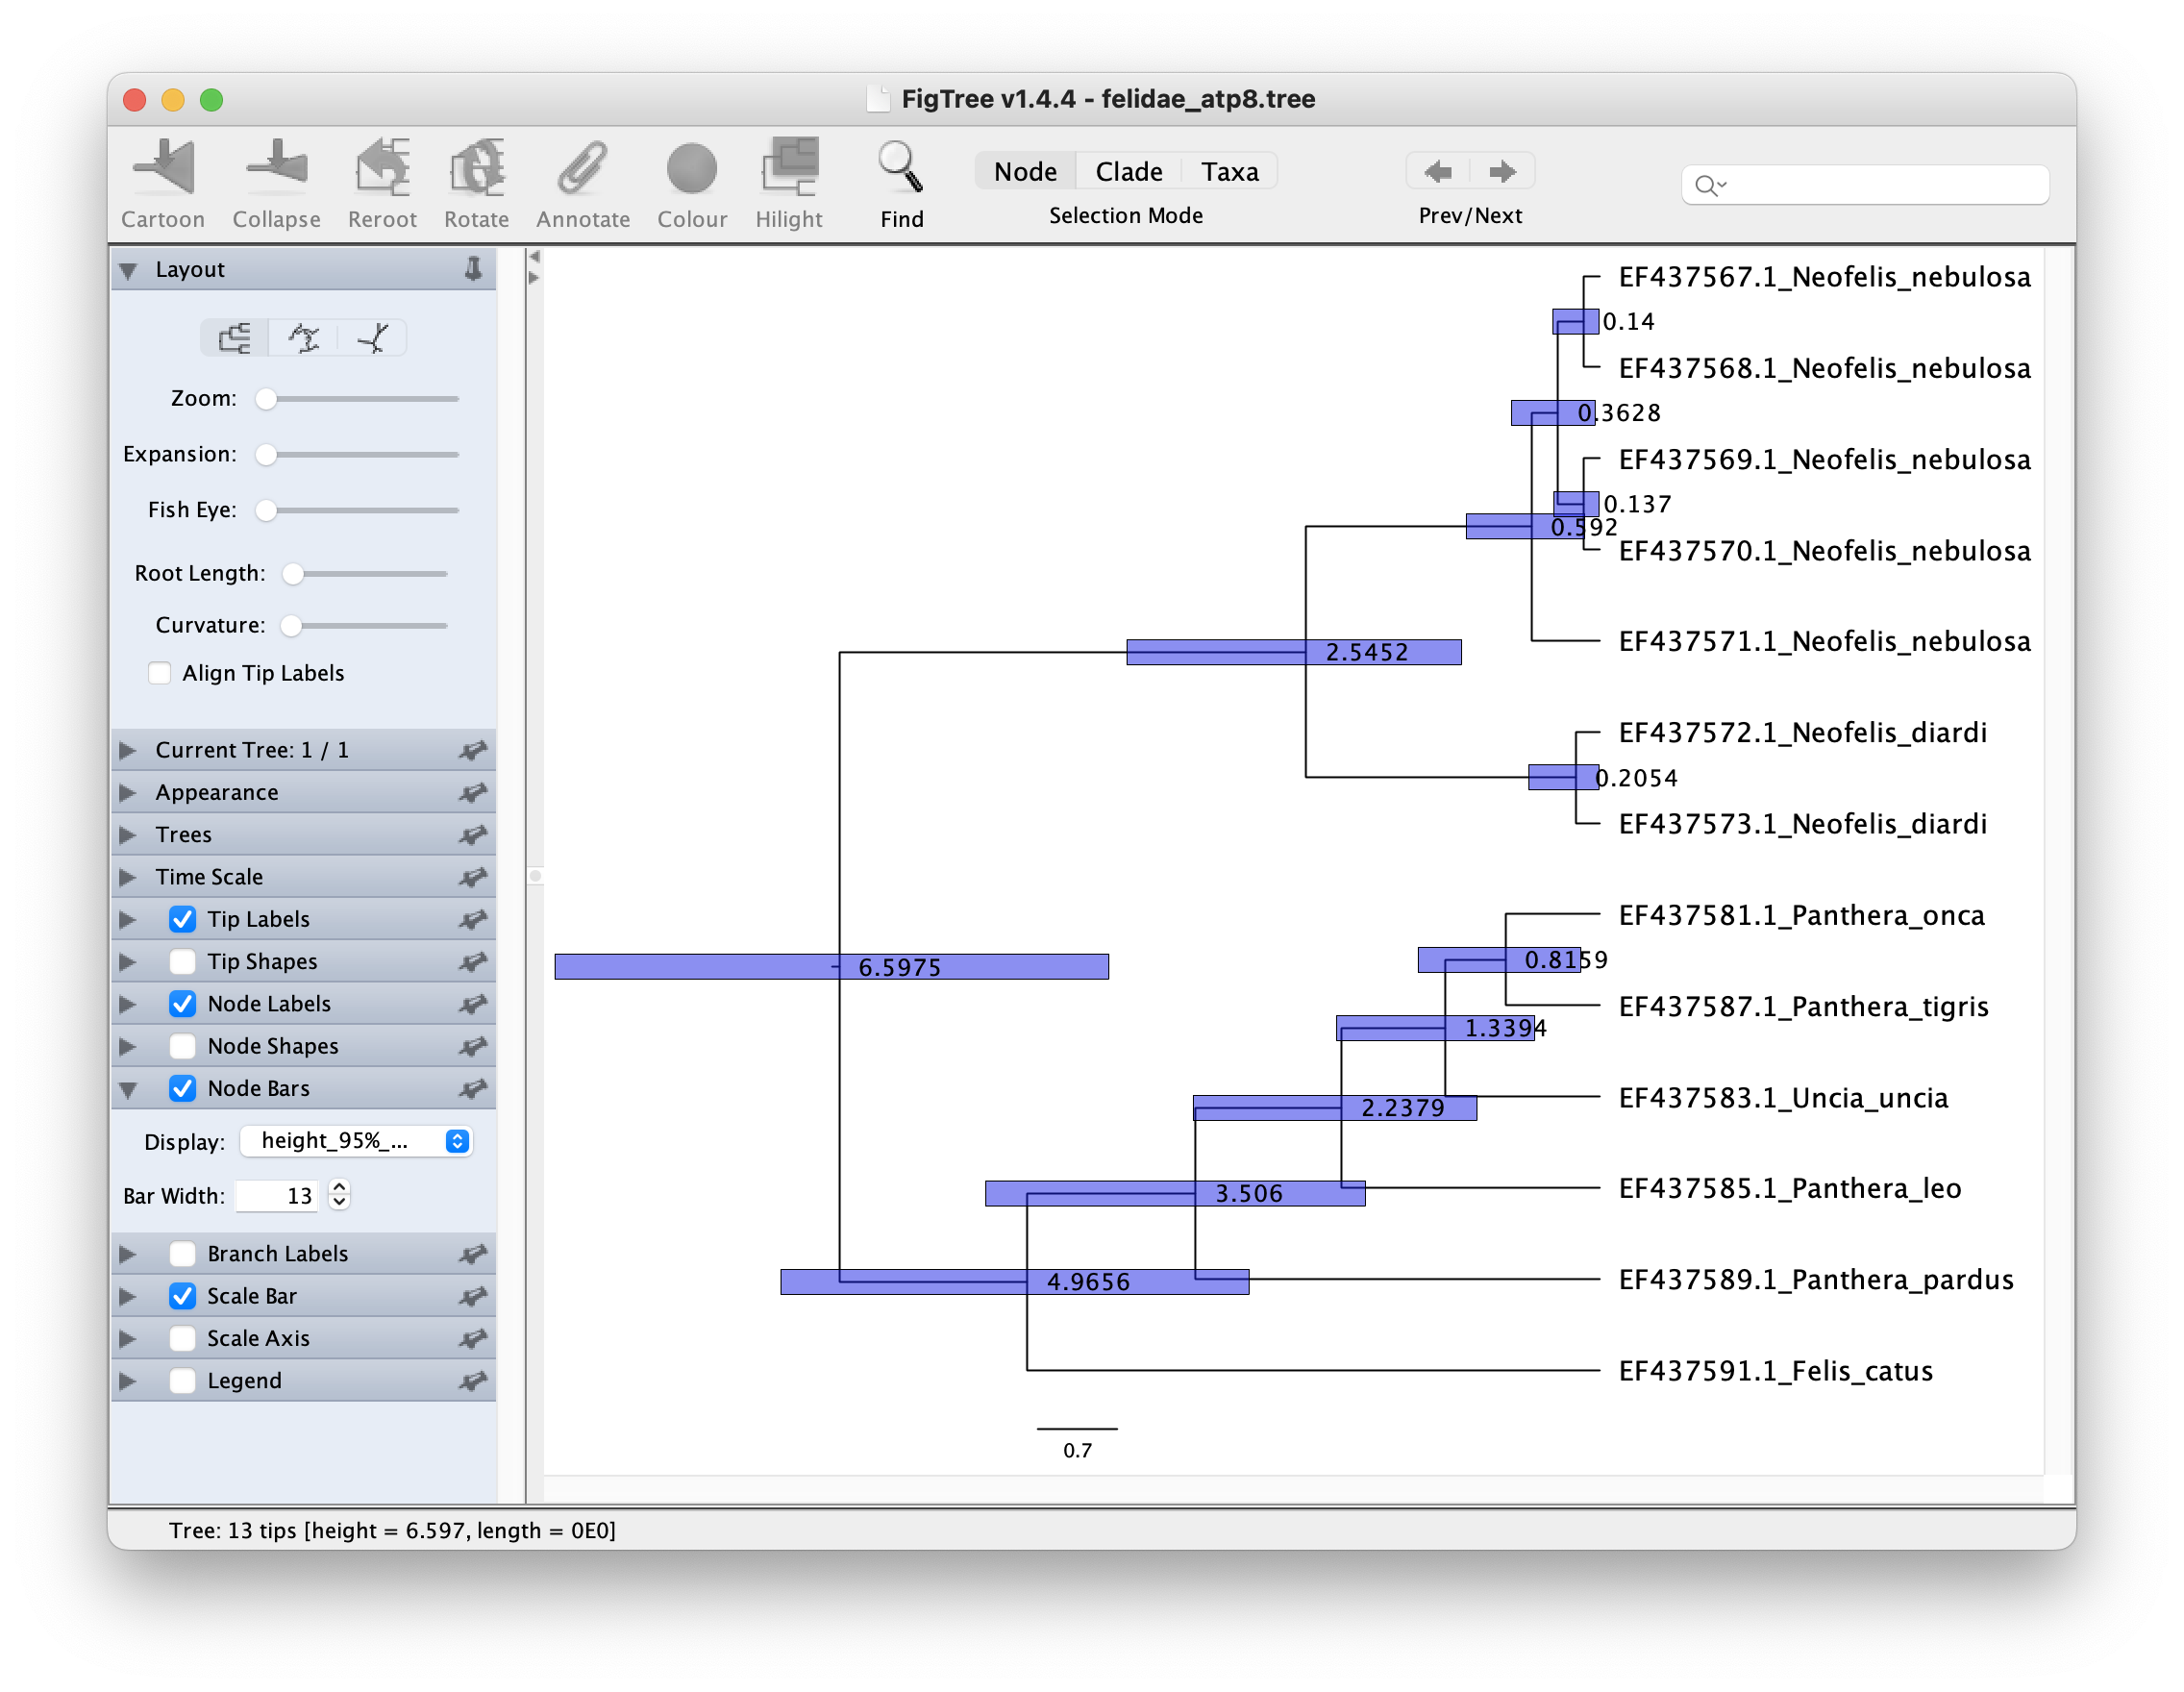

Well. The common ancestor of our smoky leopards is about 2.5 million years old.

### **6) Comparison of the results of my analysis (age of the last common ancestor of _Neofelis_) with published articles (https://www.science.org/doi/10.1126/sciadv.adh9143, https://www.sciencedirect.com/science/article/pii/S2589004222019198)**
> What conclusions can be drawn?

In the first article - https://www.science.org/doi/10.1126/sciadv.adh9143 there was a full genome analysis. Their estimate of the age of the common ancestor of smoky leopards is 2.2 million years.
And we hit 100 nucleotides pretty good!

But in the second article - https://www.sciencedirect.com/science/article/pii/S2589004222019198 - the age of the ancestor is 5.1 million years old.... Well. Interesting. I can't explain it yet. The only thing I can say is that this article has a cool map of leopard populations. Too bad I didn't see them in Sumatra or Kalimantan when I was there...(